In [3]:
import sys, os
from pathlib import Path
# from html.parser import HTMLParser
import textwrap
import random
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from datetime import datetime
from datetime import timedelta
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
# import umap
from tabulate import tabulate
from tqdm.notebook import tqdm
import yfinance as yf
import pandas as pd
# from scipy.optimize import linear_sum_assignment
from thefuzz import fuzz

from ipywidgets import widgets, Layout, HBox
from IPython.display import display, HTML
from collections import Counter

from sklearn.preprocessing import normalize
from sklearn import manifold
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import patches as mpatches

import torch
from torch.nn import functional as F
from torch import optim
from torch import autograd
from src.optim import UnitShares, FeatureExtractor, GroupMatching, PortfolioMatching, FeatureVariance, MultiCriterion, ClipWeight, GroupScoring, ManualReqs
from scipy import optimize
from scipy.stats import linregress

from src import yahoo, optim, common

# from ew_etfs import INDEX, ETF, CACHE

# flag_emojis = {'Austria': '🇦🇹','Spain': '🇪🇸','Italy': '🇮🇹','Belgium': '🇧🇪','Netherlands': '🇳🇱','Germany': '🇩🇪','Portugal': '🇵🇹','France': '🇫🇷',}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\anwan\miniconda3\lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [17]:
colors = dict(zip(common.base_sectors, common.mpl_colors))

etfnames = [#'GREK', 
    'PGAL', 'EWP', 'EWQ', 'EWK', 'EWO', 'EWN', 'EWI', 'EWG']
tknames = ['ABI.BR', 'EBS.VI', 'EDP.LS', 'ASML.AS', 'IBE.MC', 'EDPR.LS', 'SAN.MC', 'ENEL.MI', 'OMV.VI', 'ISP.MI', 'MC.PA', 'BBVA.MC', 'KBC.BR', 'VER.VI', 'PRX.AS', 'STLA.MI', 'ENI.MI', 'SAP.DE', 'SIE.DE', 'INGA.AS', 'TTE.PA', 'ALV.DE', 'UCB.BR', 'SAN.PA', 'ARGX.BR', 'UCG.MI', 'OR.PA', 'GALP.LS', 'JMT.LS', 'ADYEN.AS', 'CABK.MC', 'TEF.MC', 'RENE.LS', 'NVG.LS', 'SON.LS', 'REP.MC', 'BAS.DE', 'AD.AS', 'G.MI', 'SU.PA', 'NOS.LS', 'BCP.LS', 'DAI.DE', 'ANDR.VI', 'BG.VI', 'CTT.LS', 'AMS.MC', 'GBLB.BR', 'AENA.MC', 'WIE.VI', 'VOE.VI', 'ALTR.LS', 'DSM.AS', 'SOLB.BR', 'DTE.DE', 'FER.MC', 'AI.PA', 'BNP.PA', 'RACE.MI', 'BAYN.DE', 'DPW.DE', 'COR.LS', 'RBI.VI', 'AIR.PA', 'ITX.MC', 'CNHI.MI', 'PHIA.AS', 'AGS.BR', 'WKL.AS', 'IFX.DE', 'CLNX.MC', 'IIA.VI', 'ADS.DE', 'HEIA.AS', 'MONC.MI', 'REE.MC', 'UMI.BR', 'SOF.BR', 'CS.PA', 'ELE.MC', 'WDP.BR', 'NTGY.MC', 'SRG.MI', 'DG.PA', 'MUV2.DE', 'TRN.MI', 'AKZA.AS', 'KER.PA', 'VNA.DE', 'LNZ.VI', 'ACS.MC', 'EL.PA', 'CAI.VI', 'TKA.VI', 'VOW3.DE', 'POST.VI', 'EXO.MI', 'FBK.MI', 'ATL.MI', 'ACKB.BR', 'RMS.PA', 'GRF.MC', 'ASM.AS', 'NN.AS', 'SGRE.MC', 'BMW.DE', 'PRY.MI', 'RI.PA', 'DB1.DE', 'ENG.MC', 'ELI.BR', 'SEM.LS', 'SPI.VI', 'UQA.VI', 'ATS.VI', 'VIG.VI', 'AED.BR', 'SAF.PA', 'EOAN.DE', 'GVOLT.LS', 'UMG.AS', 'BN.PA', 'COFB.BR', 'MB.MI', 'DIE.BR', 'EVN.VI', 'PST.MI', 'DBK.DE', 'MRK.DE', 'CPR.MI', 'NEXI.MI', 'RWE.DE', 'CAP.PA', 'TEN.MI', 'CCEP.AS', 'SGO.PA', 'KPN.AS', 'PROX.BR', 'REC.MI', 'DSY.PA', 'STM.PA', 'DOC.VI', 'AGN.AS', 'AMP.MI', 'GLE.PA', 'IMCD.AS', 'TIT.MI', 'ML.PA', 'ENGI.PA', 'LR.PA', 'AER.AS', 'EGL.LS', 'TKWY.AS', 'HEIO.AS', 'SHL.DE', 'VIE.PA', 'COLR.BR', 'SBO.VI', 'ORA.PA', 'VGP.BR', 'RAND.AS', 'ABN.AS', 'ZAL.DE', 'MELE.BR', 'DIA.MI', 'FRE.DE', 'PAL.VI', 'TEP.PA', 'INW.MI', 'LIGHT.AS', 'ASRNL.AS', 'BESI.AS', 'SY1.DE', 'AALB.AS', 'TNET.BR', 'DTG.DE', 'HEN3.DE', 'BEKB.BR', 'KBCA.BR', 'PAH3.DE', 'SRT3.DE', 'FME.DE', 'ACA.PA', 'IBS.LS', 'EURN.BR', 'SEM.VI', 'BNR.DE', 'MONT.BR', 'DHER.DE', 'HNR1.DE', 'BAR.BR', 'POS.VI', 'AGR.VI', 'ZAG.VI', 'PUB.PA', '1COV.DE', 'QGEN.DE', 'MTX.DE', 'PUM.DE', 'HFG.DE', 'FACC.VI', 'GIMB.BR', 'CON.DE', 'XIOR.BR', 'HEI.DE', 'ARCAD.AS', 'CFEB.BR', 'ERF.PA', 'NBA.LS', 'PHR.LS', 'BEI.DE', 'LEG.DE', 'FAGR.BR', 'OCI.AS', 'VOW.DE', 'DIM.PA', 'XTSLA.PA', 'BFIT.AS', 'CA.PA', 'SNC.LS', 'ENR.DE', 'WLN.PA', 'CBK.DE', 'KIN.BR', 'INTER.AS', 'XTSLA.MC', 'HEN.DE', 'TWEKA.AS', 'ACCEL.AS', 'REC.BR', 'BEFB.BR', 'PNL.AS', 'EDEN.PA', 'RET.BR', 'RAM.LS', 'SBMO.AS', 'ALO.PA', 'VIV.PA', 'VPK.AS', 'HO.PA', 'KBX.DE', 'JDEP.AS', 'BOKA.AS', 'CRBN.AS', 'G1A.DE', 'URW.PA', 'EVK.DE', 'BPOST.BR', 'AKE.PA', 'TESB.BR', 'INTO.BR', 'KGX.DE', 'ECMPA.AS', 'FGR.PA', 'AFX.DE', 'BVI.PA', 'BAMNB.AS', 'ENX.PA', 'SW.PA', 'AT1.DE', 'AGFB.BR', 'AMG.AS', 'EN.PA', 'ECONB.BR', 'FLOW.AS', 'RNO.PA', 'ALFEN.AS', 'NEM.DE', 'G24.DE', 'GET.PA', 'MITRA.BR', 'NSI.AS', 'LXS.DE', 'BMW3.DE', 'ONTEX.BR', 'VLK.AS', 'BC8.DE', 'IMMO.BR', 'FUR.AS', 'AC.PA', 'FR.PA', 'GFC.PA', 'LHA.DE', 'HTOO.LS', 'TOM2.AS', 'INPST.AS', 'IBAB.BR', 'SHUR.BR', 'SLIGR.AS', 'RAA.DE', 'UN01.DE', 'OBEL.BR', 'VAN.BR', 'PHARM.AS', 'UBI.PA', 'LI.PA', 'UTDI.DE', 'EO.PA', 'WHA.AS', 'BIM.PA', 'RCO.PA', 'BOL.PA', 'AMUN.PA', 'SEV.PA', 'EDF.PA', 'CNP.PA', 'COV.PA', 'ADP.PA', 'SK.PA', 'O2D.DE', 'FPE3.DE', 'FDJ.PA', 'IPN.PA', 'RF.PA', 'CMCOM.AS', 'VASTN.AS', 'MF.PA', 'AM.PA', 'BRNL.AS', 'ORP.PA', 'BSGR.AS', 'FAST.AS', 'FFARM.AS', 'SIFG.AS',
          'NESN.SW', 'IIA.VI']
tknames = list(set(tknames))

bad = {'QGEN.DE', 'AER.AS', 'XTSLA.PA', 'XTSLA.MC', 'URW.PA', 'HTOO.LS', 'ELE.MC', 'DAI.DE', 'SEV.PA'}#'DTG.DE'}
tknames = [t for t in tknames if t not in bad]

# date = 'last'
# date = '220208'
# date = '220316'
date = '220420'
# date = None

full = [yahoo.download(t, date=date, pbar=None) for t in tqdm(tknames, desc='Tickers')]
fulltks = {t.ticker:t for t in full}
find = common.make_find(full)

etfs = [yahoo.load_portfolio(name) for name in tqdm(etfnames, desc='ETFs')]
etftks = {name: etf for name, etf in zip(etfnames,etfs)}

# tksel = [tickers[name] for name, ratio in sorted(etf['portfolio'].items(), reverse=True, key=lambda x: (x[1], x[0]))]

len(full)

Tickers:   0%|          | 0/316 [00:00<?, ?it/s]

ETFs:   0%|          | 0/8 [00:00<?, ?it/s]

316

In [18]:
options = full.copy()
len(options)

316

In [19]:
tk = random.choice(options)
# tk = options[7]
tk.ticker

'MITRA.BR'

In [20]:
# peak = tk.history['Close'].max()
# days_since_peak = (datetime.now() - tk.history.index[tk.history['Close'].argmax()]).days
# peak, days_since_peak

In [21]:
# profile, img = yahoo.profile_item(tk, 120)
# display(img)
# print(profile)

In [22]:
options = full.copy()#[:100]
# options = [tk for tk in full if tk.info.get('country') == 'Austria']
# options = [tk for tk in full if common.sector_aliases.get(tk.info.get('sector'),tk.info.get('sector')) == 'Financials']
len(options)

316

In [23]:
ptfs = {
    'EWG': 4.,
    'EWQ': 4.,
    'EWN': 4.,
    
    'EWI': 4.,
    'EWP': 1.,
    
    'EWK': 2.,
    'EWO': 3,
    'PGAL': 1.,
}
pf_wt = 0.005
_n = sum(ptfs.values())
ptfs = {k:v/_n*pf_wt for k,v in ptfs.items()}
# cr1 = PortfolioMatching(etftickers['EWG']['portfolio'], wt=1.)

mcap_fn = common.make_info_key('marketCap',log=True)
cap_cr = FeatureVariance(mcap_fn, wt=.1)

feats = [
    (-.001, common.make_info_key('currentPrice')),
    
    (-10., common.make_info_key('beta')),
    (1., common.make_info_key('pegRatio',mn=-10,mx=10)),
    (5., common.make_info_key('trailingEps', mx=25.)),
    (10., common.make_info_key('dividendYield')),
    
    (12, common.make_info_key('heldPercentInsiders')),
    (8, common.make_info_key('heldPercentInstitutions')),
    
    (20, common.make_info_key('recommendationMean')),
    (.1, common.make_info_key('numberOfAnalystOpinions')),
    (5, common.make_versus_current('targetMeanPrice',mn=0.2,mx=3)),
    (1, common.make_versus_current('targetMedianPrice',mn=0.2,mx=3)),
    (2, common.make_versus_current('targetLowPrice',mn=0.2,mx=3)),
    (1, common.make_versus_current('targetHighPrice',mn=0.2,mx=3)),
    
    
    (4, common.make_sustain_key('totalEsg')),
    (.1, common.make_sustain_key('socialScore')),
    (.1, common.make_sustain_key('governanceScore')),
    (.1, common.make_sustain_key('environmentScore')),
#     (1, make_sustain_key('socialPercentile')),
#     (1, make_sustain_key('governancePercentile')),
#     (1, make_sustain_key('environmentPercentile')),
    
]
feat_cr = FeatureExtractor(feats, wt=1.)

ret_feats = [
    (50., common.make_total_return(start='2021-01-01', end='2022-01-01')),
    (50., common.make_total_return(start='2020-01-01', end='2021-01-01')),
    (25., common.make_total_return(start='2019-01-01', end='2020-01-01')),
    (100., common.make_total_return(start='2015-01-01', end='2019-01-01')),
]
ret_cr = FeatureExtractor(ret_feats, wt=0.8)

sec_cr = GroupMatching({
    'Consumer Staples': 1.0,
    'Financials': 3.0,
    'Utilities': 1.0,
    'Technology': 5.0,
    'Energy': -1.0,
    'Consumer Discretionary': 2.0,
    'Communication Services': 3.0,
    'Industrials': 4.0,
    'Healthcare': 4.0,
    'Materials': 2.0,
    'Real Estate': 4.0,
}, common.make_info_key('sector'), wt=1.,)


nat_cr = GroupMatching({
    
 'Germany': 4.0,
 'France': 4.0,
 'Netherlands': 4.0,
    
 'Italy': 2.0,
 'Belgium': 3.0,
 'Luxembourg': 3.0,
 'Austria': 4.0,
    
 'Portugal': 0.0,
 'Spain': 3.0,
    
 'United Kingdom': 5.0,
 'Switzerland': 2.0,
 None: 0.0
}, common.make_info_key('country'), wt=1.,)


ind_cr = GroupMatching({
    'Auto & Truck Dealerships':-1, 'Auto Manufacturers':-1, 'Auto Parts':-1,
}, common.make_info_key('industry'), wt=.07)

clip_cr = ClipWeight(0.1, p=2, wt=100)

criteria = [
#     *[PortfolioMatching(etftks[name]['portfolio'], wt=w) for name, w in ptfs.items()],
#     cap_cr, 
    feat_cr,
#     ret_cr,
#     sec_cr,
#     nat_cr,
#     ind_cr,
    
    clip_cr,
]
cr = MultiCriterion(criteria)
# cr = cr5
cr.prepare(options)

S, W = feat_cr.feat_dats, feat_cr.percentile_dats
for tk, f, w in zip(options, S, W):
    tk.features = f
    tk.percentiles = w
# S.shape, W.shape

In [24]:
q = torch.randn(len(options)) * 0.
x = q.detach().numpy()
q.shape
# q.requires_grad = True
# loss = cr.loss(F.softmax(q))
# loss
# g = autograd.grad(loss, q)[0]
# g.norm()

torch.Size([316])

In [25]:
lasso = 0.
# lasso = 2.
def _loss(q, lmbda=None):
    if lmbda is None:
        lmbda = lasso
    else:
        lmbda = 0.
    w = q + lmbda * torch.randn_like(q)
    w = F.softmax(w,0)
    return cr(w).mul(-1)
def _forward(q, loss_fn=None):
    if loss_fn is None:
        loss_fn = _loss
    q = torch.from_numpy(q).float()
    return loss_fn(q).detach().numpy()
def _grad(q, loss_fn=None):
    if loss_fn is None:
        loss_fn = _loss
    q = torch.from_numpy(q).float()
    q.requires_grad = True
    loss = loss_fn(q)
    return autograd.grad(loss, q)[0].detach().numpy()

out = optimize.minimize(_forward, 
                        x0=x,
                    jac=_grad,
                  method='BFGS',
#                   method='CG',
                 )
x = out.x
out.fun, out.nit, out.success

(-0.006889393553137779, 139, False)

In [26]:
best = torch.from_numpy(x).float()
init = F.softmax(q,0).detach()
best = F.softmax(best,0)
# print([f'{i.item():1.3f}' for i in best])
# best.mul(1000).round().div(1000)

     %  Symbol    Name                             Country    Sector              Industry                                  Market Cap (%)
------  --------  -------------------------------  ---------  ------------------  --------------------------------------  ----------------
10      BMW.DE    BAYERISCHE MOTOREN WERKE AG      Germany    Consumer Cyclical   Auto Manufacturers                               88.6076
10      RMS.PA    HERMES INTL                      France     Consumer Cyclical   Luxury Goods                                     97.7848
10      REC.MI    RECORDATI ORD                    Italy      Healthcare          Drug Manufacturers—General                       52.2152
10      VOW3.DE   VOLKSWAGEN AG                    Germany    Consumer Cyclical   Auto Manufacturers                               96.2025
 9.9    RAA.DE    RATIONAL AG                      Germany    Industrials         Specialty Industrial Machinery                   40.1899
 9.7    MUV2.DE   MUENCHENE

<IPython.core.display.Javascript object>


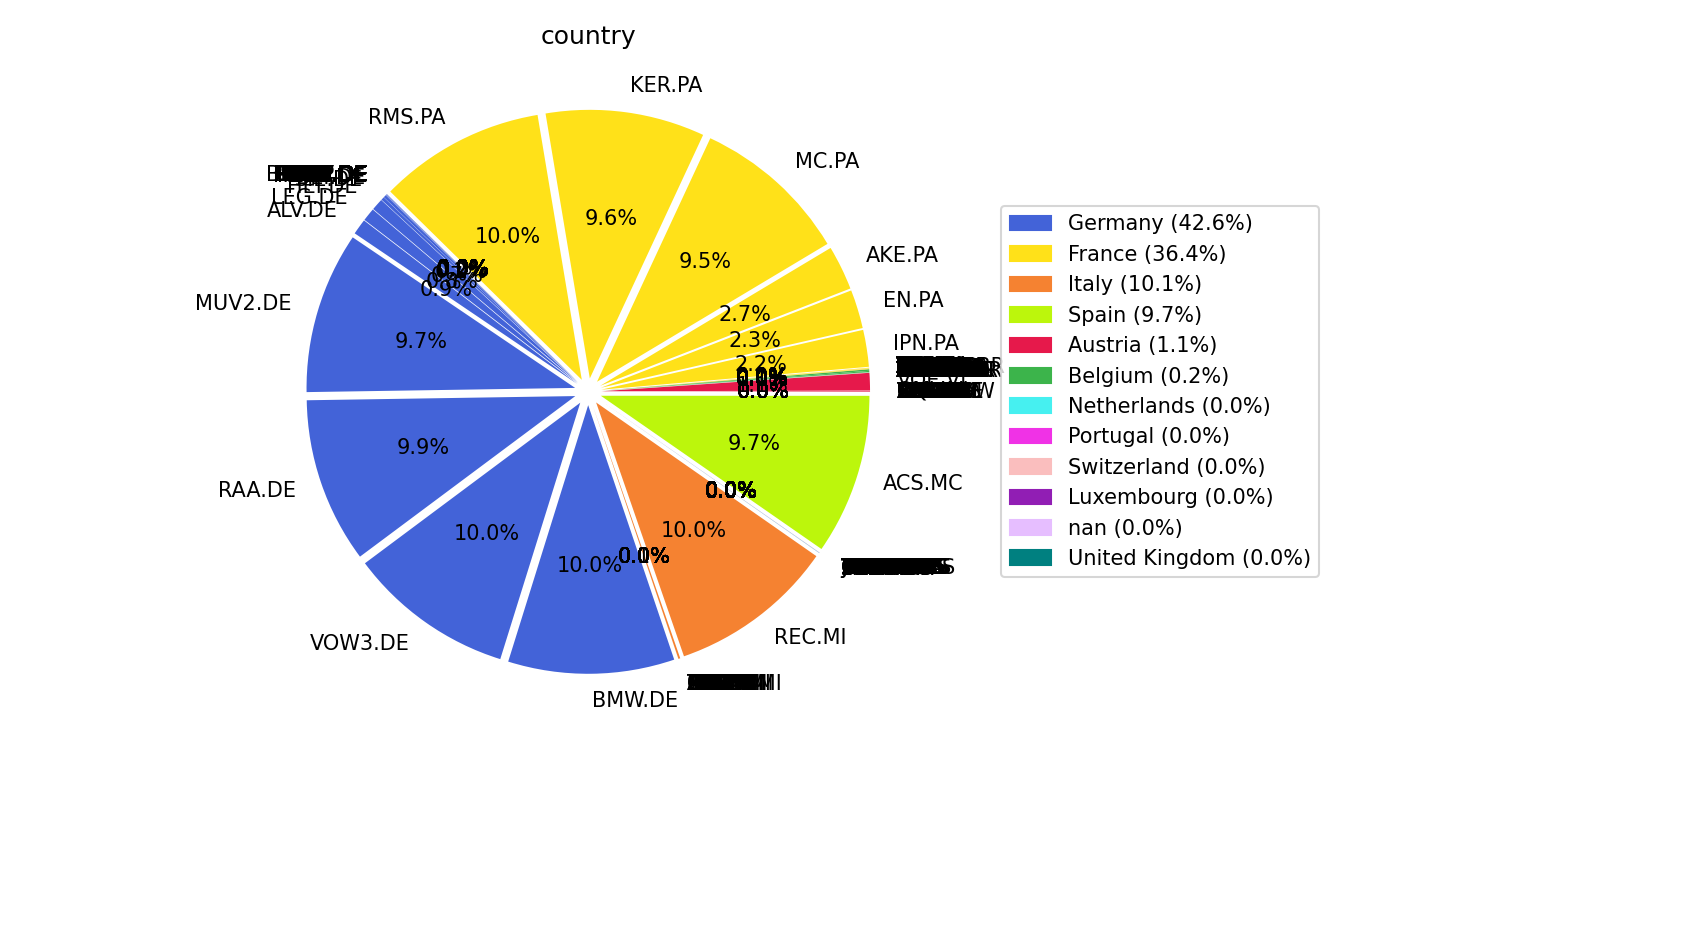

<IPython.core.display.Javascript object>


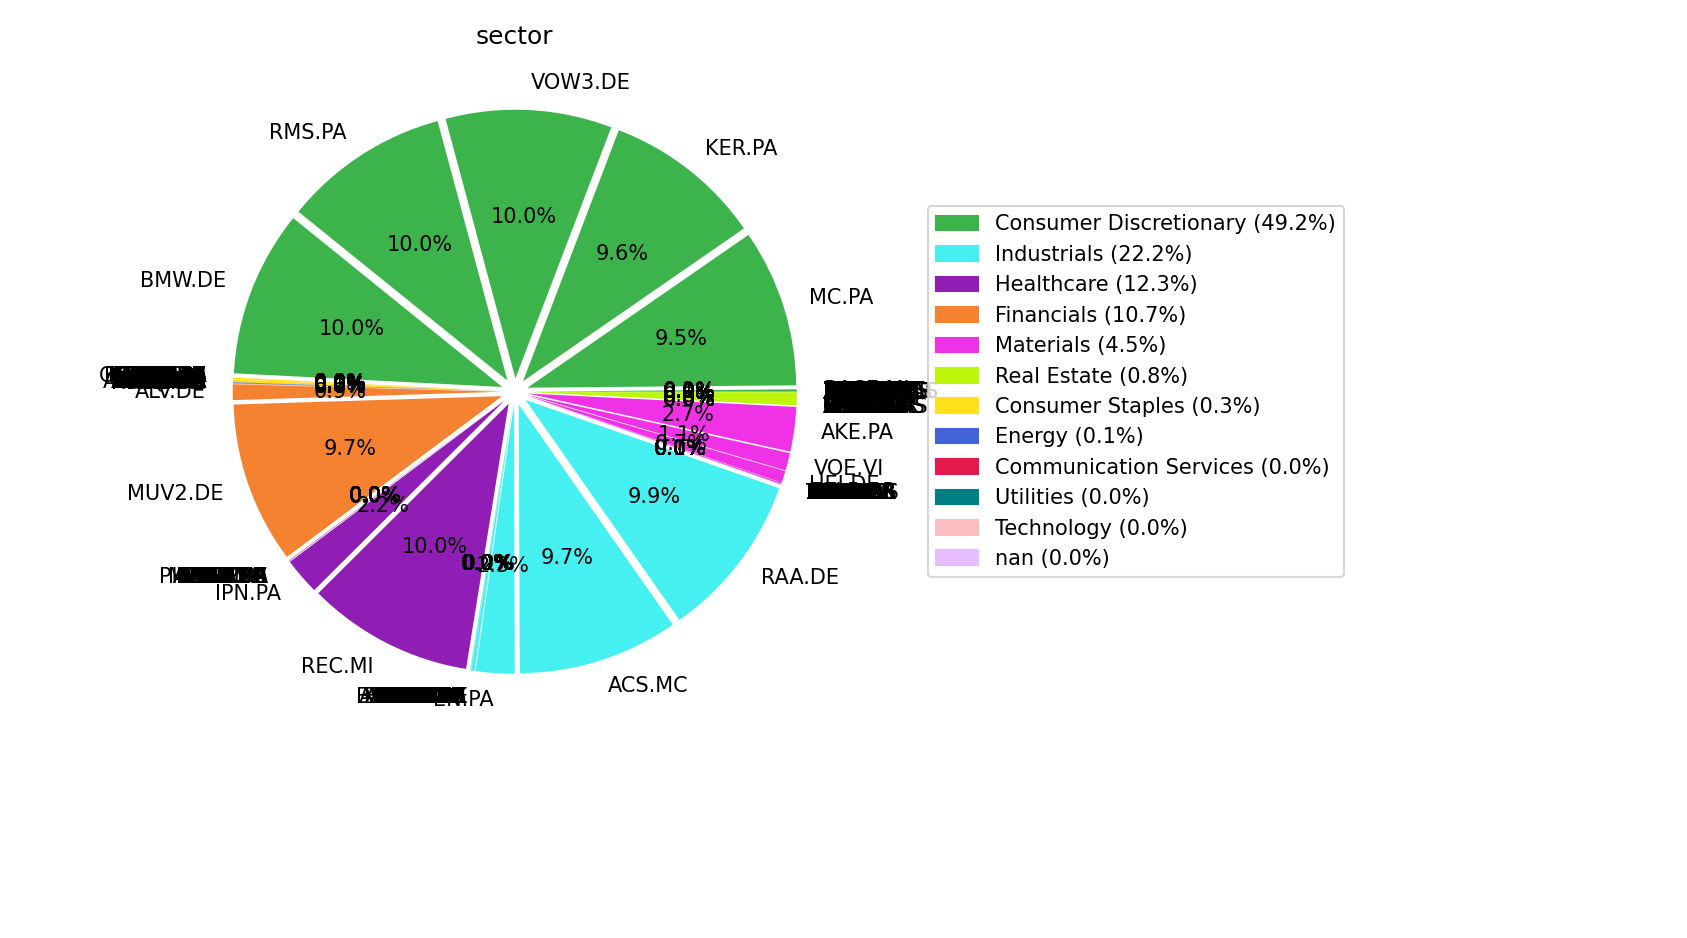

In [27]:
pf = list(zip(options, best))

print(tabulate([
    [
        f'{r*100:.2g}', 
        tk.ticker, 
        tk.info.get('shortName'), 
        tk.info.get('country'), 
        tk.info.get('sector'), 
        tk.info.get('industry'), 
#         *common.eye_brows(tk), 
        common.fn_percentile(tk, mcap_fn, options)
    ] 
                for tk, r in sorted(pf, key=lambda x: (x[1], x[0].ticker), reverse=True)[:20]], 
    headers=
    [
        '%', 
        'Symbol', 
        'Name', 
        'Country', 
        'Sector', 
        'Industry', 
#         'Eye', 'Double Eye', 
        'Market Cap (%)'
    ]))

for key in [
    'country', 
    'sector', 
#     'industry',
]:
    common.plot_piece_pie(options, best.tolist(), key=key, colors=None, aliases=common.sector_aliases);
    plt.title(key)
    plt.tight_layout()

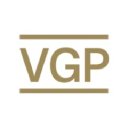

VGP.BR - VGP

Sector: Real Estate
Industry: Real Estate Services

Location: Antwerp, Belgium

Recommendation: 1.8 (-8.3%)
PEG: nan
Beta: 0.4
MarketCap (log): 9.722030566002882
Yield: 1.4%

VGP NV

VGP NV, together with its subsidiaries, develops, owns, and manages logistics and semi-industrial real estate, and
ancillary offices. The company leases its properties to tenants in logistic sector, including storing, assembling, re-
conditioning, and final treatment of the goods. It also offers asset and property management services; and facility
management services, such as maintenance, waste management, greenery maintenance services, etc. The company operates in
Germany, Spain, Italy, the Netherlands, Austria, Portugal, the Czech Republic, Slovakia, Hungary, Romania and, Latvia.
VGP NV was founded in 1998 and is headquartered in Antwerp, Belgium.
Website: https://www.vgpparks.eu

Quote: https://finance.yahoo.com/quote/VGP.BR
-----------------------  ----------  ----
currentPrice           

<IPython.core.display.Javascript object>

In [16]:
tk = find('VGP')
profile, img = yahoo.profile_item(tk, 120)
display(img)
print(profile)
print(tabulate([[fn.key, fn(tk), f'{common.fn_percentile(tk, fn, options):1.1f}'] for w, fn in [*feats, (0,mcap_fn)]]))
print(*common.eye_brows(tk))
print([f'{fn(tk):1.2f}' for _, fn in ret_feats])
plt.figure(figsize=(9,5))
# for tk in full[:10]:
df = tk.history

startdate = '2016-01-01'
startdate = '2018-01-01'

df = common.from_to(df, start=startdate)
date_array  = df.index
# price_array = df['Close'] / df['Open'][0] * 100 - 100
# plt.ylabel('% change (Open: {:.2f})'.format(df['Open'][0]))
price_array = df['Close']
plt.ylabel('Price')
plt.plot(date_array, price_array, linestyle = 'solid', label=tk.ticker);
plt.legend();
plt.tight_layout();

In [15]:
# {x for x in {tk.info.get('industry'):0. for tk in options} if x is not None and 'Auto' in x}

# Semi-Manual Selection

Using the feature extractor, rank the assets by fixing either the country or the sector, and then selecting the top options.

Goal: (1) consolidate down to 20-30 assets that have the desired categorical balance (primarily sector and country), (2) weigh the assets based on individual manual review (with recorded rankings)

Updates: periodically (eg. 6 months, annually), compare the performance to the previous rankings, adjust the rankings, identify 5-10 new potential assets, reinvest the dividends, and/or rebalance existing.

In [28]:
flag_emojis = {'Switzerland': '🇨🇭', 'Austria': '🇦🇹','Spain': '🇪🇸','Italy': '🇮🇹','Belgium': '🇧🇪','Netherlands': '🇳🇱','Germany': '🇩🇪','Portugal': '🇵🇹','France': '🇫🇷', 'United Kingdom': '🇬🇧'}
sector_emojis = {
    'Consumer Staples': '🛒',# '🍎',
    'Financials': '💰', # '💵', #'🪙',
    'Utilities': '💧', #'🛁', # '🚿', # '🚰',
    'Technology': '📱', #'💻',
    'Energy': '🔥', #'🛢', # '⚡️'
    'Consumer Discretionary': '🎁', # '🛍'
    'Communication Services': '📞', # '📡', 
    'Industrials': '⚙️',# '🔧', #'🏭',
    'Healthcare': '💊', #'💉',
    'Materials': '🌲', #'🧱', # '📦',
    'Real Estate': '🏠',
#     '?': '❓',
}
sector_emojis.update({key: sector_emojis.get(alias) for key, alias in common.sector_aliases.items()})
country_selected = {
    'Austria': [],
    'Spain': [],
    'Italy': [],
    'Belgium': [],
    'Netherlands': [],
    'Germany': [],
    'Portugal': [],
    'France': [],
}

In [29]:
len(options)

316

In [30]:
etftks.keys()

dict_keys(['PGAL', 'EWP', 'EWQ', 'EWK', 'EWO', 'EWN', 'EWI', 'EWG'])

In [31]:
wts, feat_fns = zip(*feats)
wts = np.array(wts)
fnames = np.array([fn.key for fn in feat_fns])
len(feat_fns)

name = 'EWG'

etf = etftks[name]
rats = etf['portfolio']
len(rats)

61

In [32]:
manual_picks = {
#     'EWK': ['COLR.BR', 'SOLB.BR', 'UMI.BR', 'VGP.BR', 'PROX.BR', 'AGS.BR'],
#     'EWP': ['ACS.MC'],
    
    
    'EWG': ['SAP.DE', 'SIE.DE', 'ALV.DE', 'BAS.DE', 'DTE.DE', 'BAYN.DE'],
    'EWK': ['ABI.BR', 'KBC.BR', 'UCB.BR', 'ARGX.BR', 'GBLB.BR', 'SOLB.BR', 'WDP.BR'],
    'EWQ': ['STM.PA', 'MC.PA', 'TTE.PA', 'SAN.PA', 'KER.PA', 'RMS.PA', 'AI.PA', 'SU.PA'],
    'EWN': ['ASML.AS', 'PRX.AS', 'INGA.AS', 'AD.AS', 'PHIA.AS', 'ASM.AS', 'NN.AS'],
    'EWI': ['RACE.MI', 'G.MI', 'ENI.MI', 'PRY.MI', 'ENEL.MI', 'UCG.MI'],
    'EWP': ['IBE.MC', 'SAN.MC', 'BBVA.MC', 'TEF.MC', 'AMS.MC', 'FER.MC', 'ITX.MC', 'GRF.MC'],
    'EWO': ['EBS.VI', 'OMV.VI', 'VER.VI', 'ANDR.VI', 'BG.VI', 'VOE.VI', 'ATS.VI', 'CAI.VI', 'WIE.VI', ],
    'PGAL': ['EDP.LS', 'EDPR.LS', 'GALP.LS', 'JMT.LS', 'NVG.LS', 'SON.LS', 'NOS.LS'], 
}

In [33]:
# if True:
# for name, etf in etftks.items():
print(name)
rats = {k:v for k,v in etf['portfolio'].items() if k in etf['portfolio']}
len(rats)
tks = [find(key) for key in rats if key in fulltks]

vals = sorted([(sum(p for p in tk.percentiles.tolist() if p-p == 0), tk) for tk in tks])

C = np.array([common.apply(fn, tks, default=0.) for fn in feat_fns])
cost = wts @ C
order = np.argsort(cost)
order = np.argsort(np.array([rats[tk.ticker] for tk in tks]))
sel = order[-20:][::-1]
x = np.array(tks)
# cmn, cmx = cost.min(), cost.max()

def _top3_nums(tk):
    raw = torch.as_tensor([(p if p-p==0 else 0.) for p in tk.percentiles.tolist()])
    vs, inds = raw.sort(0,descending=True)#[:3].tolist()
    vs = vs[:3].mul(100).tolist()
    ns = fnames[inds[:3].tolist()].tolist()
    return ', '.join(f'{n} ({v:1.1f}%)' for n,v in zip(ns,vs))

display(HTML(common.html_tabulate([[tk.ticker,
                                    100*rats[tk.ticker], 
                                    c, 
                                    flag_emojis.get(tk.info.get('country')),
                                    sector_emojis.get(tk.info.get('sector'), ''), #tk.info.get('sector', '') + ' ' + sector_emojis.get(tk.info.get('sector'), ''),
                                    tk.info.get('currentPrice'),
                                    _top3_nums(tk),
#                                     ', '.join(fnames[tk.percentiles.sort(0,descending=True)[1][:3].tolist()].tolist()),
                                   ]
                                 for tk, c in zip(x[sel], cost[sel])], 
                                colors=[colors[common.sector_aliases.get(tk.info.get('sector'),tk.info.get('sector'))] for tk in x[sel]])))

EWG


C:\Users\anwan\OneDrive\Khan\projects\stox\src\common.py:116: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 116 of the file C:\Users\anwan\OneDrive\Khan\projects\stox\src\common.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(tbl)


SAP.DE,8.68,118.75,🇩🇪,📱,98.48,"numberOfAnalystOpinions (100.0%), currentPrice (94.3%), pegRatio (68.1%)"
SIE.DE,8.06,201.081,🇩🇪,⚙️,119.76,"currentPrice (93.0%), totalEsg (72.3%), numberOfAnalystOpinions (71.0%)"
ALV.DE,7.06,210.284,🇩🇪,💰,220.3,"trailingEps (89.2%), currentPrice (87.2%), governanceScore (60.1%)"
BAS.DE,4.67,180.448,🇩🇪,🌲,52.92,"currentPrice (96.9%), numberOfAnalystOpinions (74.2%), environmentScore (72.4%)"
DTE.DE,4.18,121.205,🇩🇪,📞,17.3,"currentPrice (99.0%), beta (62.2%), numberOfAnalystOpinions (61.3%)"
BAYN.DE,3.98,112.484,🇩🇪,💊,65.07,"currentPrice (96.2%), socialScore (88.8%), totalEsg (75.8%)"
DPW.DE,3.96,130.003,🇩🇪,⚙️,41.945,"currentPrice (97.6%), numberOfAnalystOpinions (77.4%), pegRatio (54.4%)"
IFX.DE,3.57,123.354,🇩🇪,📱,28.32,"currentPrice (98.4%), numberOfAnalystOpinions (71.0%), heldPercentInstitutions (61.3%)"
ADS.DE,3.47,163.297,🇩🇪,🎁,208.05,"numberOfAnalystOpinions (90.3%), currentPrice (87.9%), trailingEps (62.3%)"
MUV2.DE,2.94,229.479,🇩🇪,💰,242.8,"trailingEps (89.3%), currentPrice (85.9%), numberOfAnalystOpinions (64.5%)"
VNA.DE,2.8,107.111,🇩🇪,🏠,39.62,"currentPrice (97.7%), beta (68.9%), numberOfAnalystOpinions (67.7%)"


In [34]:
[tk.ticker for tk in x[sel][:6].tolist()]

['SAP.DE', 'SIE.DE', 'ALV.DE', 'BAS.DE', 'DTE.DE', 'BAYN.DE']

0.1743


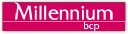

BCP.LS - B.C.P.-BCO COMERCIAL PORTUGUES

Sector: Financial Services
Industry: Banks—Regional

Location: Porto, Portugal

Recommendation: 2.3 (12.4%)
PEG: 0.4
Beta: 2.0
MarketCap (log): 9.420668212557658
Yield: 0.0%

Banco Comercial Português, S.A.

Banco Comercial PortuguÃªs, S.A., together with its subsidiaries, provides various banking and financial products and
services under the Millennium bcp brand. It operates through Retail Banking; Companies, Corporate & Investment Banking;
Private Banking; Foreign Business; and Other segments. The company offers a range of financial products and services,
including current accounts, payment systems, savings and investment products, and private banking services; and asset
management and investment banking services, such as mortgage loans, consumer credit, commercial banking, leasing,
factoring and insurance, and others. It also provides venture capital, real-estate management, e-commerce, brokerage,
real estate investment fund, consulting, inve

<IPython.core.display.Javascript object>


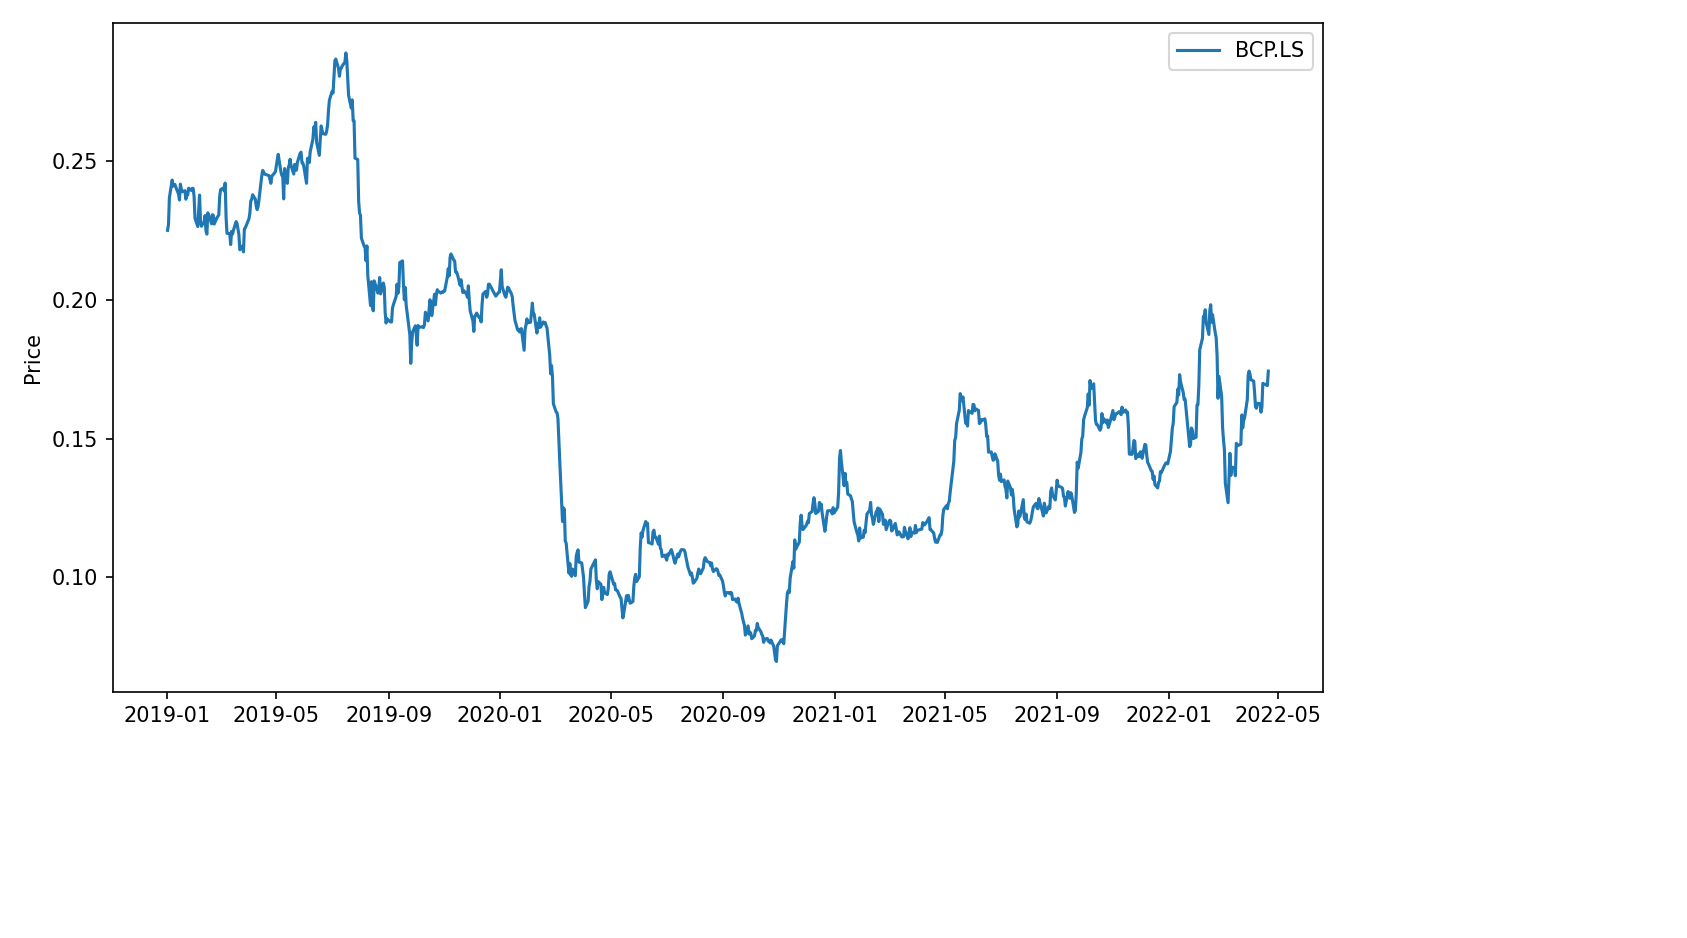

In [35]:
tk = find('BCP')

profile, img = yahoo.profile_item(tk, 120)
print(tk.info.get('currentPrice'))
display(img)
print(profile)
print(tabulate([[fn.key, fn(tk), f'{common.fn_percentile(tk, fn, options):1.1f}'] for w, fn in [*feats, (0,mcap_fn)]]))
print(*common.eye_brows(tk))
print([f'{fn(tk):1.2f}' for _, fn in ret_feats])
plt.figure(figsize=(9,5))
# for tk in full[:10]:
df = tk.history

startdate = '2016-01-01'
startdate = '2019-01-01'

df = common.from_to(df, start=startdate)
date_array  = df.index
# price_array = df['Close'] / df['Open'][0] * 100 - 100
# plt.ylabel('% change (Open: {:.2f})'.format(df['Open'][0]))
price_array = df['Close']
plt.ylabel('Price')
plt.plot(date_array, price_array, linestyle = 'solid', label=tk.ticker);
plt.legend();
plt.tight_layout();

In [36]:
[(i,fn.key,w) for i,(w,fn) in enumerate(feats)]

[(0, 'currentPrice', -0.001),
 (1, 'beta', -10.0),
 (2, 'pegRatio', 1.0),
 (3, 'trailingEps', 5.0),
 (4, 'dividendYield', 10.0),
 (5, 'heldPercentInsiders', 12),
 (6, 'heldPercentInstitutions', 8),
 (7, 'recommendationMean', 20),
 (8, 'numberOfAnalystOpinions', 0.1),
 (9, 'targetMeanPrice', 5),
 (10, 'targetMedianPrice', 1),
 (11, 'targetLowPrice', 2),
 (12, 'targetHighPrice', 1),
 (13, 'totalEsg', 4),
 (14, 'socialScore', 0.1),
 (15, 'governanceScore', 0.1),
 (16, 'environmentScore', 0.1)]

In [37]:
manual_picks = {
#     'EWK': ['COLR.BR', 'SOLB.BR', 'UMI.BR', 'VGP.BR', 'PROX.BR', 'AGS.BR'],
#     'EWP': ['ACS.MC'],
    
    
    'EWG': ['SAP.DE', 'SIE.DE', 'ALV.DE', 'BAS.DE', 'DTE.DE', 'BAYN.DE'],
    'EWK': ['ABI.BR', 'KBC.BR', 'UCB.BR', 'ARGX.BR', 'GBLB.BR', 'SOLB.BR', 'WDP.BR'],
    'EWQ': ['STM.PA', 'MC.PA', 'TTE.PA', 'SAN.PA', 'KER.PA', 'RMS.PA', 'AI.PA', 'SU.PA'],
    'EWN': ['ASML.AS', 'PRX.AS', 'INGA.AS', 'AD.AS', 'PHIA.AS', 'ASM.AS', 'NN.AS'],
    'EWI': ['RACE.MI', 'G.MI', 'ENI.MI', 'PRY.MI', 'ENEL.MI', 'UCG.MI'],
    'EWP': ['IBE.MC', 'SAN.MC', 'BBVA.MC', 'TEF.MC', 'AMS.MC', 'FER.MC', 'ITX.MC', 'GRF.MC'],
    'EWO': ['EBS.VI', 'OMV.VI', 'VER.VI', 'ANDR.VI', 'BG.VI', 'VOE.VI', 'ATS.VI', 'CAI.VI', 'WIE.VI', ],
    'PGAL': ['EDP.LS', 'EDPR.LS', 'GALP.LS', 'JMT.LS', 'NVG.LS', 'SON.LS', 'NOS.LS'], 
}
picks = [x for v in manual_picks.values() for x in v]
picks = [find(key) for key in picks]
len(picks)

58

In [38]:

x = np.array(picks)
xC = np.array([common.apply(fn, picks, default=0.) for fn in feat_fns]).T
w2 = wts.copy()
w2[0] = 0
xc = xC @ wts

xorder = sorted([(tk.info.get('sector'), -xc[i], i) for i, tk in enumerate(x)])
xorder = np.array([i[-1] for i in xorder])
x = x[xorder]
picks_order = x.tolist()
xc = xc[xorder]
# cmn, cmx = cost.min(), cost.max()

def _top3_nums(tk):
    raw = torch.as_tensor([(p if p-p==0 else 0.) for p in tk.percentiles.tolist()])
    vs, inds = raw.sort(0,descending=True)#[:3].tolist()
    vs = vs[:3].mul(100).tolist()
    ns = fnames[inds[:3].tolist()].tolist()
    return ', '.join(f'{n} ({v:1.1f}%)' for n,v in zip(ns,vs))

html_table = [[tk.ticker,
#                                     100*rats[tk.ticker], 
    c, 
    flag_emojis.get(tk.info.get('country')),
    sector_emojis.get(tk.info.get('sector'), ''), #tk.info.get('sector', '') + ' ' + sector_emojis.get(tk.info.get('sector'), ''),
    tk.info.get('currentPrice'),
    _top3_nums(tk),
#                                     ', '.join(fnames[tk.percentiles.sort(0,descending=True)[1][:3].tolist()].tolist()),
   ]
 for tk,c in zip(x, xc)]
html_table_colors = [colors[common.sector_aliases.get(tk.info.get('sector'),tk.info.get('sector'))] for tk in x]
display(HTML(common.html_tabulate(html_table, colors=html_table_colors)))

C:\Users\anwan\OneDrive\Khan\projects\stox\src\common.py:116: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 116 of the file C:\Users\anwan\OneDrive\Khan\projects\stox\src\common.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(tbl)


VOE.VI,210.837,🇦🇹,🌲,25.24,"currentPrice (98.5%), totalEsg (82.5%), environmentScore (70.3%)"
SOLB.BR,193.476,🇧🇪,🌲,89.32,"currentPrice (94.8%), environmentScore (80.6%), totalEsg (65.6%)"
BAS.DE,180.448,🇩🇪,🌲,52.92,"currentPrice (96.9%), numberOfAnalystOpinions (74.2%), environmentScore (72.4%)"
AI.PA,135.482,🇫🇷,🌲,161.78,"currentPrice (90.6%), numberOfAnalystOpinions (87.1%), beta (65.3%)"
NVG.LS,51.9564,🇵🇹,🌲,3.686,"currentPrice (99.8%), heldPercentInsiders (79.2%), dividendYield (56.7%)"
WIE.VI,19.3738,🇦🇹,🌲,27.52,"currentPrice (98.4%), heldPercentInstitutions (68.9%), pegRatio (53.9%)"
TEF.MC,139.498,🇪🇸,📞,4.885,"currentPrice (99.7%), dividendYield (85.4%), numberOfAnalystOpinions (77.4%)"
DTE.DE,121.205,🇩🇪,📞,17.3,"currentPrice (99.0%), beta (62.2%), numberOfAnalystOpinions (61.3%)"
PRX.AS,114.761,🇳🇱,📞,44.79,"targetHighPrice (100.0%), currentPrice (97.4%), targetMeanPrice (88.1%)"
NOS.LS,71.6249,🇵🇹,📞,4.04,"currentPrice (99.8%), dividendYield (77.5%), recommendationMean (70.4%)"
KER.PA,225.279,🇫🇷,🎁,541.9,"trailingEps (100.0%), numberOfAnalystOpinions (83.9%), currentPrice (68.4%)"


In [39]:
display(HTML(common.html_tabulate(html_table, colors=html_table_colors)))

VOE.VI,210.837,🇦🇹,🌲,25.24,"currentPrice (98.5%), totalEsg (82.5%), environmentScore (70.3%)"
SOLB.BR,193.476,🇧🇪,🌲,89.32,"currentPrice (94.8%), environmentScore (80.6%), totalEsg (65.6%)"
BAS.DE,180.448,🇩🇪,🌲,52.92,"currentPrice (96.9%), numberOfAnalystOpinions (74.2%), environmentScore (72.4%)"
AI.PA,135.482,🇫🇷,🌲,161.78,"currentPrice (90.6%), numberOfAnalystOpinions (87.1%), beta (65.3%)"
NVG.LS,51.9564,🇵🇹,🌲,3.686,"currentPrice (99.8%), heldPercentInsiders (79.2%), dividendYield (56.7%)"
WIE.VI,19.3738,🇦🇹,🌲,27.52,"currentPrice (98.4%), heldPercentInstitutions (68.9%), pegRatio (53.9%)"
TEF.MC,139.498,🇪🇸,📞,4.885,"currentPrice (99.7%), dividendYield (85.4%), numberOfAnalystOpinions (77.4%)"
DTE.DE,121.205,🇩🇪,📞,17.3,"currentPrice (99.0%), beta (62.2%), numberOfAnalystOpinions (61.3%)"
PRX.AS,114.761,🇳🇱,📞,44.79,"targetHighPrice (100.0%), currentPrice (97.4%), targetMeanPrice (88.1%)"
NOS.LS,71.6249,🇵🇹,📞,4.04,"currentPrice (99.8%), dividendYield (77.5%), recommendationMean (70.4%)"
KER.PA,225.279,🇫🇷,🎁,541.9,"trailingEps (100.0%), numberOfAnalystOpinions (83.9%), currentPrice (68.4%)"


In [40]:
css_str = '<style>.foo{color:#F00;} )} </style>'


out = widgets.Output()

def OnClick():
    with out:
        print('QQQ')

# html_bt=HTML(css_str + '<button class="button-style" onclick="IPython.notebook.kernel.execute(\'OnClick()\')"> <img src="https://www.fnordware.com/superpng/pnggrad16rgb.png" alt="Snow"></button>')


In [41]:
_past_selected = {'MC.PA', 'PRY.MI', 'ABI.BR', 'BAYN.DE', 'G.MI', 'BAS.DE', 'EBS.VI', 'DTE.DE', 'NN.AS', 'PHIA.AS', 'VER.VI', 'OMV.VI', 'SOLB.BR', 'CAI.VI', 'TEF.MC', 'ENI.MI', 'VOE.VI', 'SAN.MC', 'STM.PA', 'ENEL.MI', 'WDP.BR', 'KBC.BR', 'PRX.AS', 'ALV.DE', 'SAP.DE', 'ASML.AS', 'SIE.DE', 'TTE.PA', 'AD.AS', 'ITX.MC', 'INGA.AS', 'SAN.PA', 'IBE.MC', 'SU.PA'}

In [42]:
# picks = [o for o in options if o.ticker in _past_selected]
# len(picks)

In [43]:
# bt = widgets.Button(
#     description='Click me',
#     disabled=False,
#     button_style='', # 'success', 'info', 'warning', 'danger' or ''
#     tooltip='Click me',
#     icon='check' # (FontAwesome names without the `fa-` prefix)
# )
rows = []
cbs = []
for tk, ht, hc in zip(picks_order, html_table, html_table_colors):
    cb = widgets.Checkbox()
    if tk.ticker in _past_selected:
        cb.value = True
    cbs.append(cb)
    cb.layout.width = '15ex'
    html_out = widgets.Output()
    with html_out:
        display(HTML(common.html_tabulate([ht], colors=[hc])))
    h_box = HBox([cb, html_out])
    rows.append(h_box)
widgets.VBox(rows)

In [44]:
selected = [tk for tk, cb in zip(picks_order, cbs) if cb.value]
len(selected)

34

In [45]:
print(selected)

[<VOE.VI>, <SOLB.BR>, <BAS.DE>, <TEF.MC>, <DTE.DE>, <PRX.AS>, <MC.PA>, <ITX.MC>, <AD.AS>, <ABI.BR>, <OMV.VI>, <TTE.PA>, <ENI.MI>, <ALV.DE>, <NN.AS>, <KBC.BR>, <INGA.AS>, <SAN.MC>, <EBS.VI>, <G.MI>, <PHIA.AS>, <SAN.PA>, <BAYN.DE>, <SIE.DE>, <PRY.MI>, <SU.PA>, <WDP.BR>, <CAI.VI>, <ASML.AS>, <STM.PA>, <SAP.DE>, <VER.VI>, <IBE.MC>, <ENEL.MI>]


In [46]:
Counter(sorted([tk.info.get('country') for tk in selected]))

Counter({'Austria': 5,
         'Belgium': 4,
         'France': 4,
         'Germany': 6,
         'Italy': 4,
         'Netherlands': 6,
         'Spain': 4,
         'Switzerland': 1})

In [47]:
prices = {}
for c, p in [(tk.info.get('country'), tk.info.get('currentPrice')) for tk in selected]:
    if c not in prices:
        prices[c] = []
    prices[c].append(p)
for c, ps in prices.copy().items():
    prices[c] = sorted(ps)
prices

{'Austria': [25.24, 27.95, 32.04, 45.61, 98.4],
 'Belgium': [40.88, 56.99, 65.62, 89.32],
 'Germany': [17.3, 52.92, 65.07, 98.48, 119.76, 220.3],
 'Spain': [3.212, 4.885, 10.62, 20.86],
 'Netherlands': [9.73, 27.51, 28.345, 44.79, 48.45, 591.4],
 'France': [47.035, 102.36, 143.22, 642.3],
 'Italy': [6.165, 14.228, 18.765, 30.76],
 'Switzerland': [35.69]}

In [48]:
len(picks)

58

# EZU

In [60]:
extra = ['MBG', 'MT', 'URW', ]
ezu_tks = ('ASML', 'MC', 'TTE', 'SAP', 'SAN', 'SIE', 'OR', 'ALV', 'SU', 'AI', 'AIR', 'BAYN', 'IBE', 'BNP', 'DTE', 'MBG', 'SAN', 'CS', 'DG', 'ENEL', 'EL', 'BAS', 'ABI', 'PRX', 'KER', 'DPW', 'RI', 'RMS', 'IFX', 'ADS', 'INGA', 'SAF', 'ADYEN', 'BBVA', 'ISP', 'MUV2', 'ENI', 'BN', 'CAP', 'VNA', 'DB1', 'AD', 'STLA', 'DSY', 'VOW3', 'DSM', 'CRH', 'SGO', 'STM', 'NOKIA', 'AMS', 'BMW', 'PHIA', 'RWE', 'WKL', 'RACE', 'MRK', 'DBK', 'TEF', 'EOAN', 'G', 'LR', 'HEIA', 'CLNX', 'SAMPO', 'ENGI', 'ITX', 'ORA', 'ML', 'UCG', 'TEP', 'GLE', 'VIE', 'MT', 'UMG', 'REP', 'FLTR', 'NESTE', 'Eur Cash', 'KBC', 'Usd Cash', 'SHL', 'KRZ', 'KNEBV', 'XTSLA', 'ASM', 'UPM', 'AKZA', 'CNHI', 'SY1', 'KRX', 'CABK', 'UCB', 'FRE', 'PAH3', 'ACA', 'ARGX', 'NN', 'EDP', 'FME', 'PUB', 'HO', 'ERF', 'CA', 'FER', 'AENA', 'EBS', 'BNR', 'MTX', 'EDEN', 'TRN', 'HEN3', 'SRG', 'KPN', 'SRT3', 'MONC', 'DTG', 'STERV', 'DIM', 'ZAL', 'GBLB', 'QGEN', 'SK3', 'BEI', 'WLN', 'HNR1', 'ATL', 'VIV', 'CCEP', '1COV', 'IMCD', 'AGN', 'URW', 'FBK', 'ENR', 'HEIO', 'PUM', 'AGS', 'PRY', 'FGR', 'ELISA', 'HEI', 'UMI', 'BVI', 'LEG', 'EXO', 'VOW', 'FORTUM', 'EN', 'CON', 'GET', 'ENX', 'CBK', 'KESKOB', 'HFG', 'ALO', 'EDPR', 'AKE', 'SOLB', 'SW', 'VER', 'RAND', 'DHER', 'TEN', 'OMV', 'ACS', 'ELE', 'HEN', 'AER', 'JMT', 'REE', 'AFX', 'MB', 'G1A', 'EVK', 'PST', 'NTGY', 'NEXI', 'CPR', 'GALP', 'TKWY', 'AC', 'ABN', 'AMP', 'KBX', 'NEM', 'SOF', 'AT1', 'GRF', 'GFC', 'LI', 'ORNBV', 'LHA', 'RNO', 'REC', 'ADP', 'BIM', 'BMW3', 'EDF', 'BC8', 'ELI', 'BOL', 'RCO', 'G24', 'IPN', 'KGX', 'DIA', 'AM', 'SK', 'ENG', 'FDJ', 'AMUN', 'CNP', 'UBI', 'SGRE', 'FR', 'WRT1V', 'COV', 'UTDI', 'RF', 'VOE', 'LXS', 'RAA', 'INW', 'TIT', 'MF', 'PROX', 'O2D', 'JDEP', 'EO', 'ORP', 'UN01', 'FPE3', 'Cash Collateral Eur Jpfft', 'COLR', 'RBI', 'INPST')
ezu_amounts = (5.48, 3.92, 2.51, 2.29, 2.29, 2.09, 1.98, 1.92, 1.79, 1.64, 1.41, 1.33, 1.27, 1.27, 1.19, 1.19, 1.17, 1.12, 1.09, 1.07, 1.04, 1.03, 1.02, 0.99, 0.94, 0.94, 0.91, 0.89, 0.88, 0.88, 0.81, 0.8, 0.78, 0.75, 0.75, 0.74, 0.73, 0.71, 0.71, 0.68, 0.67, 0.66, 0.65, 0.65, 0.63, 0.62, 0.61, 0.6, 0.59, 0.58, 0.58, 0.57, 0.55, 0.55, 0.55, 0.54, 0.53, 0.52, 0.51, 0.51, 0.5, 0.5, 0.49, 0.49, 0.48, 0.47, 0.47, 0.46, 0.45, 0.45, 0.44, 0.43, 0.41, 0.41, 0.38, 0.38, 0.38, 0.38, 0.36, 0.36, 0.35, 0.35, 0.35, 0.35, 0.35, 0.34, 0.34, 0.32, 0.32, 0.31, 0.3, 0.3, 0.3, 0.3, 0.29, 0.29, 0.28, 0.27, 0.27, 0.27, 0.27, 0.26, 0.26, 0.26, 0.26, 0.25, 0.25, 0.25, 0.24, 0.24, 0.24, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.21, 0.21, 0.2, 0.2, 0.2, 0.2, 0.19, 0.19, 0.19, 0.19, 0.18, 0.18, 0.18, 0.18, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.1, 0.1, 0.1, 0.1, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.04, 0.04, 0.04, 0.03)
found, missing = [], []
for t in ezu_tks:
    try:
        tk = find(t)
        found.append(tk)
    except KeyError:
        missing.append(t)
len(found), len(missing)
ezu = dict(zip(ezu_tks,ezu_amounts))
ezu = {tk:ezu[tk.ticker.split('.')[0]] for tk in found}
len(ezu_tks), len(ezu)

(237, 210)

In [61]:
# print(missing)

In [62]:
Counter([tk.info.get('country') for tk in found])

Counter({'Netherlands': 26,
         'France': 60,
         'Germany': 57,
         'Spain': 19,
         'Italy': 20,
         'Belgium': 12,
         None: 2,
         'Switzerland': 1,
         'United Kingdom': 2,
         'Portugal': 3,
         'Luxembourg': 4,
         'Austria': 5})

In [63]:
sp = Counter()
for tk, c in ezu.items():
    sp[tk.info.get('country')] += c#*100
# sum(sp.values())
print(tabulate(sp.items()))

--------------  -----
Netherlands     16.11
France          29.98
Germany         24.44
Spain            7.24
Italy            6.11
Belgium          2.78
                 0.7
Switzerland      0.59
United Kingdom   0.52
Portugal         0.52
Luxembourg       0.54
Austria          0.64
--------------  -----


In [64]:
sp = Counter()
for tk, c in ezu.items():
    sp[tk.info.get('sector')] += c#*100
# sum(sp.values())
print(tabulate(sp.items()))

----------------------  -----
Technology              12.18
Consumer Cyclical       12.46
Energy                   4.02
Financial Services      14.75
Industrials             14.74
Consumer Defensive       7.43
Basic Materials          5.37
Healthcare               6.32
Utilities                5.64
Communication Services   5.31
Real Estate              1.25
                         0.7
----------------------  -----


# Manual Selection

In [65]:
# vocab = list(ezu.keys())
# for v in vocab:
#     del v.cb
#     v.cb = widgets.Checkbox()
#     v.cb.layout.width = '15ex'
# vocab

# vocab.append(find('IIA.VI'))
vocab = [o for o in options]

len(vocab)

316

In [66]:
feat_keys = [fn.key for fn in feat_fns]
print(feat_keys)

['currentPrice', 'beta', 'pegRatio', 'trailingEps', 'dividendYield', 'heldPercentInsiders', 'heldPercentInstitutions', 'recommendationMean', 'numberOfAnalystOpinions', 'targetMeanPrice', 'targetMedianPrice', 'targetLowPrice', 'targetHighPrice', 'totalEsg', 'socialScore', 'governanceScore', 'environmentScore']


In [67]:
feat_orders = ['recommendationMean', 'numberOfAnalystOpinions', 'dividendYield', 'heldPercentInsiders', 'heldPercentInstitutions', 'targetMeanPrice', 'targetMedianPrice', 'targetLowPrice', 'targetHighPrice', 'totalEsg', 'socialScore', 'governanceScore', 'environmentScore', 'beta', 'pegRatio', 'trailingEps']
feat_inds = [feat_keys.index(key) for key in feat_orders]
feat_inds

[7, 8, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 1, 2, 3]

In [68]:
presel = {'SIE.DE', 'TTE.PA', 'BBVA.MC', 'NEXI.MI', 'IIA.VI', 'ALV.DE', 'JMT.LS', 'OR.PA', 'ABI.BR', 'AIR.PA', 'DTE.DE', 'ENEL.MI', 'EBS.VI', 'SAP.DE', 'BAYN.DE', 'AMS.MC', 'ENI.MI', 'ASML.AS', 'AI.PA', 'TEF.MC', 'SU.PA', 'SAN.PA', 'MC.PA', 'PROX.BR', 'RBI.VI', 'IBE.MC', 'VNA.DE'}
presel = {'SIE.DE', 'REP.MC', 'CS.PA', 'EDF.PA', 'OMV.VI', 'TTE.PA', 'BAS.DE', 'BBVA.MC', 'NEXI.MI', 'IIA.VI', 'ALV.DE', 'JMT.LS', 'ADYEN.AS', 'WDP.BR', 'OR.PA', 'ABI.BR', 'AIR.PA', 'ITX.MC', 'DTE.DE', 'ENEL.MI', 'EBS.VI', 'LHA.DE', 'BAYN.DE', 'MRK.DE', 'SAP.DE', 'AMS.MC', 'ASML.AS', 'ENI.MI', 'AI.PA', 'TEF.MC', 'KER.PA', 'SU.PA', 'VER.VI', 'SHL.DE', 'MC.PA', 'SAN.PA', 'PROX.BR', 'RBI.VI', 'IBE.MC', 'PRX.AS', 'EOAN.DE', 'VNA.DE', 'BNP.PA'}
presel = {'SIE.DE', 'REP.MC', 'UBI.PA', 'CS.PA', 'ISP.MI', 'INGA.AS', 'EDF.PA', 'OMV.VI', 'HEN.DE', 'VIV.PA', 'TTE.PA', 'NESN.SW', 'AD.AS', 'TKA.VI', 'BAS.DE', 'BBVA.MC', 'NEXI.MI', 'IIA.VI', 'ALV.DE', 'CA.PA', 'JMT.LS', 'ZAL.DE', 'ADS.DE', 'ADYEN.AS', 'WDP.BR', 'ABI.BR', 'AIR.PA', 'DTE.DE', 'ITX.MC', 'ORA.PA', 'SAN.MC', 'ENEL.MI', 'EBS.VI', 'LHA.DE', 'SAP.DE', 'BAYN.DE', 'MRK.DE', 'AMS.MC', 'ENI.MI', 'ASML.AS', 'AI.PA', 'TEF.MC', 'KER.PA', 'SU.PA', 'VER.VI', 'SHL.DE', 'MC.PA', 'SAN.PA', 'PROX.BR', 'RBI.VI', 'IBE.MC', 'PRX.AS', 'EOAN.DE', 'VNA.DE', 'BNP.PA', 'PHIA.AS'}
presel = {'REP.MC', 'UBI.PA', 'SIE.DE', 'CS.PA', 'ISP.MI', 'INGA.AS', 'EDF.PA', 'OMV.VI', 'HEN.DE', 'VIV.PA', 'TTE.PA', 'NESN.SW', 'AD.AS', 'TKA.VI', 'BAS.DE', 'BBVA.MC', 'NEXI.MI', 'CA.PA', 'ALV.DE', 'JMT.LS', 'IIA.VI', 'ZAL.DE', 'ADS.DE', 'WDP.BR', 'ABI.BR', 'AIR.PA', 'DTE.DE', 'ITX.MC', 'ORA.PA', 'SAN.MC', 'ENEL.MI', 'EBS.VI', 'LHA.DE', 'AMS.MC', 'SAP.DE', 'ENI.MI', 'BAYN.DE', 'ASML.AS', 'MRK.DE', 'AI.PA', 'TEF.MC', 'KER.PA', 'SU.PA', 'VER.VI', 'SHL.DE', 'SAN.PA', 'MC.PA', 'PROX.BR', 'RBI.VI', 'IBE.MC', 'PRX.AS', 'EOAN.DE', 'VNA.DE', 'BNP.PA', 'PHIA.AS'}

In [69]:
row_titles = ['Sel', 'Ticker', 'Name', 'Country', 'Sector', 'Industry', 'Price', 'Market Cap', 'EZU', *feat_orders]
def _collect_tk(tk):
    
    name = tk.info.get('shortName')
    
    country = flag_emojis.get(tk.info.get('country'))
    sector = sector_emojis.get(tk.info.get('sector'))
    if sector is None:
        sector = tk.info.get('sector')
    else:
        s = tk.info.get('sector')
        sector = f'{sector} {s}'
    
    ind = tk.info.get('industry')
    price = tk.info.get('currentPrice')
    
    mcap = tk.info.get('marketCap')
    if isinstance(mcap, (int,float)):
        mcap = np.round(np.log10(mcap)*1000)/1000
    else:
        mcap = None
    
    ez = ezu.get(tk)
    
    scores = [f'{s.mul(1000).round().div(1000).item():.3f} ({p.mul(1000).round().div(10).item():.2f})' for s, p in zip(tk.features[feat_inds], tk.percentiles[feat_inds])]
    return [tk.ticker in presel, tk.ticker, name, country, sector, ind, price, mcap, ez, *scores]

def _name_order_fn(ident='country'):
    def _order_fn(tk):
        name = tk.info.get(ident)
        if name is None:
            name = ''

        q = ezu.get(tk, 0.)
        q = -q

        return (name, q)
    return _order_fn

In [70]:
import pandas as pd
import qgrid

In [71]:
rows = [_collect_tk(tk) for tk in vocab]
len(rows)

316

In [72]:
df = pd.DataFrame(rows,
               columns = row_titles)

In [73]:
qgrid_widget = qgrid.show_grid(df, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

25.24


VOE.VI - VOESTALPINE AG

Sector: Basic Materials
Industry: Steel

Location: Linz, Austria

Recommendation: 2.7 (49.4%)
PEG: 0.1
Beta: 1.3
MarketCap (log): 9.653778640664527
Yield: 1.6%

Voestalpine AG

Voestalpine AG processes, develops, manufactures, and sells steel products worldwide. The company operates through five
segments: Steel, High Performance Metals, Metal Engineering, Metal Forming, and Other. The Steel division produces hot
and cold-rolled steel strips, as well as electrogalvanized, hot-dip galvanized, and organically coated steel strips; and
heavy plates for the energy sector, as well as turbine casings for automotive, white goods/consumer goods,
building/construction, energy, mechanical engineering, and others. The High Performance Metals segment offers special
alloys for the oil and natural gas, aerospace, and energy engineering industries; tool manufacturing, component
processing, heat treatment, and coating services; and warehousing and preprocessing of special steels

<IPython.core.display.Javascript object>


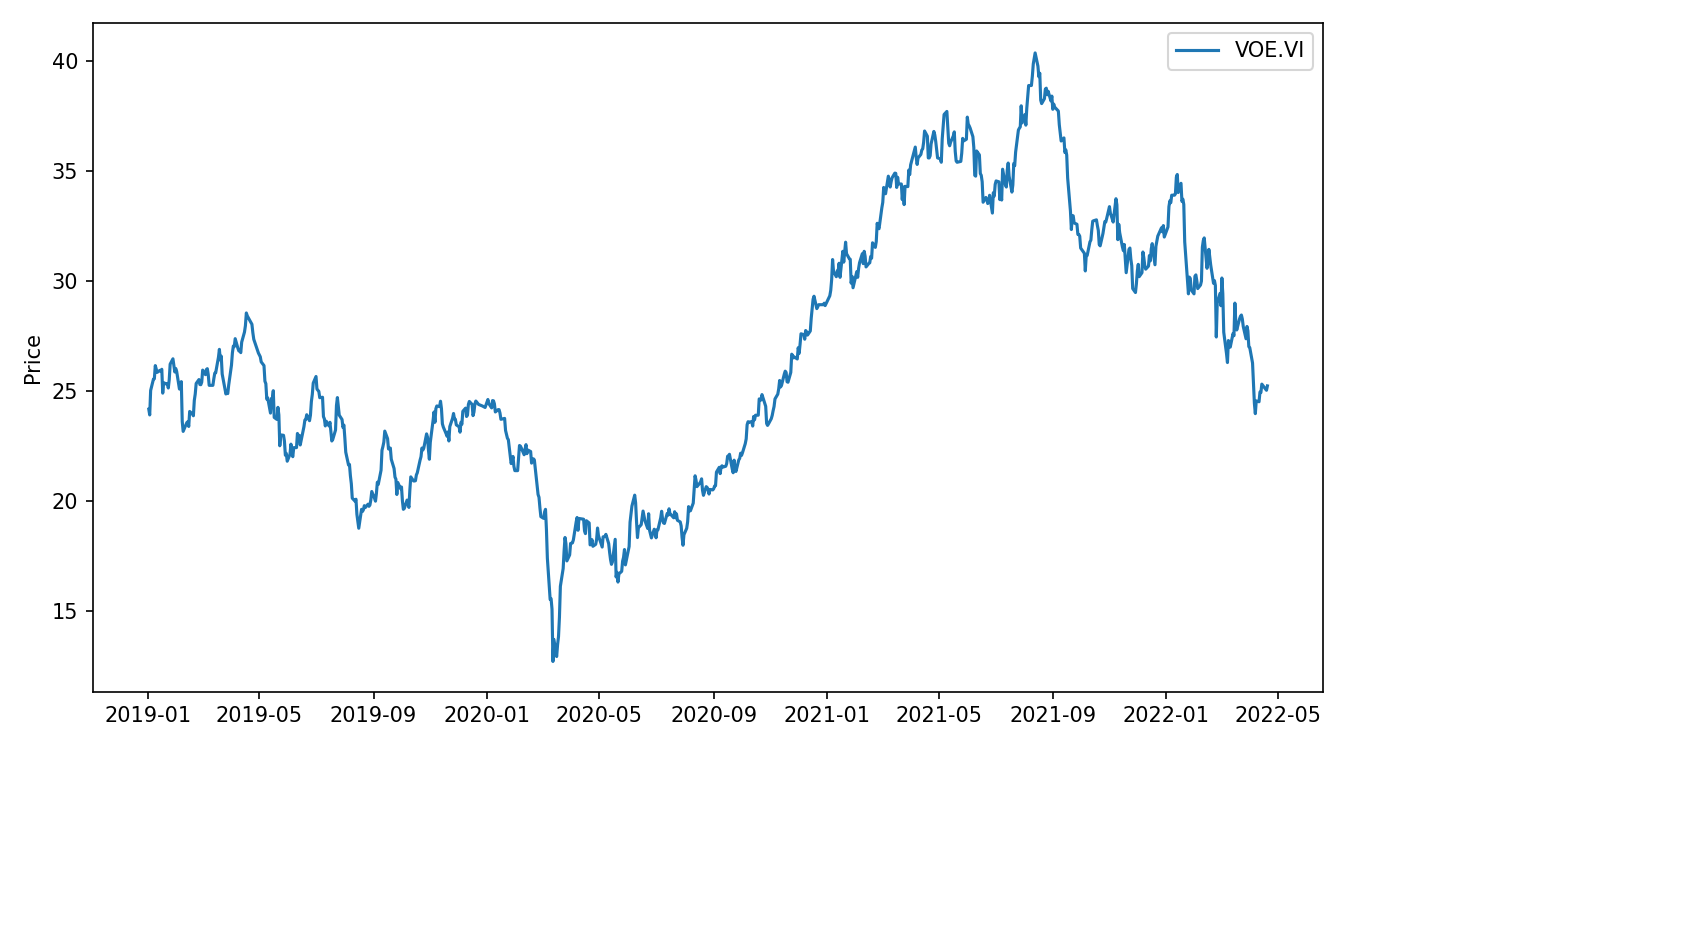

In [74]:
tk = find('VOE')

profile, img = yahoo.profile_item(tk, 120)
print(tk.info.get('currentPrice'))
display(img)
print(profile)
print(tabulate([[fn.key, fn(tk), f'{common.fn_percentile(tk, fn, options):1.1f}'] for w, fn in [*feats, (0,mcap_fn)]]))
print(*common.eye_brows(tk))
print([f'{fn(tk):1.2f}' for _, fn in ret_feats])
plt.figure(figsize=(9,5))
# for tk in full[:10]:
df = tk.history

startdate = '2016-01-01'
startdate = '2019-01-01'

df = common.from_to(df, start=startdate)
date_array  = df.index
# price_array = df['Close'] / df['Open'][0] * 100 - 100
# plt.ylabel('% change (Open: {:.2f})'.format(df['Open'][0]))
price_array = df['Close']
plt.ylabel('Price')
plt.plot(date_array, price_array, linestyle = 'solid', label=tk.ticker);
plt.legend();
plt.tight_layout();

In [75]:
vnames = set(qgrid_widget.get_changed_df()['Ticker'].to_numpy()[qgrid_widget.get_changed_df()['Sel'].to_numpy()].tolist())
print(vnames)
len(vnames)

{'ITX.MC', 'SU.PA', 'VIV.PA', 'MRK.DE', 'AI.PA', 'EBS.VI', 'ASML.AS', 'AMS.MC', 'KER.PA', 'ADS.DE', 'JMT.LS', 'EOAN.DE', 'SAP.DE', 'ENI.MI', 'VNA.DE', 'WDP.BR', 'DTE.DE', 'MC.PA', 'TEF.MC', 'AIR.PA', 'ABI.BR', 'NEXI.MI', 'OMV.VI', 'PHIA.AS', 'ENEL.MI', 'BBVA.MC', 'CS.PA', 'IIA.VI', 'REP.MC', 'TTE.PA', 'SIE.DE', 'ORA.PA', 'SHL.DE', 'ALV.DE', 'BNP.PA', 'HEN.DE', 'AD.AS', 'PRX.AS', 'UBI.PA', 'IBE.MC', 'VER.VI', 'NESN.SW', 'TKA.VI', 'INGA.AS', 'LHA.DE', 'BAYN.DE', 'ISP.MI', 'SAN.MC', 'EDF.PA', 'SAN.PA', 'BAS.DE', 'PROX.BR', 'CA.PA', 'RBI.VI', 'ZAL.DE'}


55

In [254]:
# rows = [row_titles]
# cbs = []
# cb = widgets.Checkbox()
# cb.layout.width = '15ex'
# # html_out = widgets.Output()
# # with html_out:
# #     display(HTML(common.html_tabulate([row_titles])))
# # rows.append(html_out)
# cbs.append(cb)
# for tk in sorted(vocab, key=_name_order_fn('country')):
#     row = _collect_tk(tk)
#     rows.append(row)
#     cbs.append(tk.cb)
# html_out = widgets.Output()
# with html_out:
#     display(HTML(common.html_tabulate(rows)))
# #     h_box = HBox([tk.cb, html_out])
# #     rows.append(h_box)
# widgets.HBox([widgets.VBox(cbs), html_out])

In [255]:
# rows = []
# cb = widgets.Checkbox()
# cb.layout.width = '15ex'
# html_out = widgets.Output()
# with html_out:
#     display(HTML(common.html_tabulate([row_titles])))
# rows.append(HBox([cb, html_out]))
# for tk in sorted(vocab, key=_name_order_fn('country')):
#     row = _collect_tk(tk)
    
#     html_out = widgets.Output()
#     with html_out:
#         display(HTML(common.html_tabulate([row])))
#     h_box = HBox([tk.cb, html_out])
#     rows.append(h_box)
# widgets.VBox(rows)

In [76]:
torch.set_printoptions(precision=3,linewidth=200, sci_mode=False)
def VZ(t, fg=2):
    print(torch.as_tensor(t).float())
    return
    fg += 1
    print(torch.as_tensor(t).float().mul(10**fg).round().div(10**fg))

In [77]:
def optimize_portfolio(tks, sectors=None, countries=None, reqs=None, sector_wt=1., country_wt=1., req_wt=1000., unit_wt=1., capital=100000, clip_lim=0.1, clip_wt=100):
    crs = []
    unit_cr = UnitShares(capital, p=2, wt=unit_wt)
    crs.append(unit_cr)
    clip_cr = ClipWeight(clip_lim, p=2, wt=clip_wt)
    crs.append(clip_cr)
    if reqs is not None:
        req_cr = ManualReqs(reqs, wt=req_wt)
        crs.append(req_cr)
    if sectors is not None:
        sec_cr = GroupMatching(sectors, common.make_info_key('sector'), aliases=common.sector_aliases, as_logits=False, wt=sector_wt,)
        crs.append(sec_cr)
    if countries is not None:
        nat_cr = GroupMatching(countries, common.make_info_key('country'), wt=country_wt, as_logits=False)
        crs.append(nat_cr)
    cr = MultiCriterion(crs)
    cr.prepare(tks)
    
    q = torch.randn(len(tks)) * 0.
    x = q.detach().numpy()
    lasso = 0.
    # lasso = 2.
    def _loss(q, lmbda=None):
        if lmbda is None:
            lmbda = lasso
        else:
            lmbda = 0.
        w = q + lmbda * torch.randn_like(q)
        w = F.softmax(w,0)
        return cr(w).mul(-1)
    def _forward(q, loss_fn=None):
        if loss_fn is None:
            loss_fn = _loss
        q = torch.from_numpy(q).float()
        return loss_fn(q).detach().numpy()
    def _grad(q, loss_fn=None):
        if loss_fn is None:
            loss_fn = _loss
        q = torch.from_numpy(q).float()
        q.requires_grad = True
        loss = loss_fn(q)
        return autograd.grad(loss, q)[0].detach().numpy()

    out = optimize.minimize(_forward, 
                            x0=x,
                        jac=_grad,
                      method='BFGS',
    #                   method='CG',
                     )
    x = out.x
#     print(out.fun, out.nit, out.success)

    best = torch.from_numpy(x).float()
    init = F.softmax(q,0).detach()
    best = F.softmax(best,0)
    price = unit_cr.capital / unit_cr.param
    count = unit_cr.param * best
    count = count.int()
    cost = price * count
    total = cost.sum().item()
    return best, x, cr, count, cost, total

def group_tables(vals, key='country'):
    total = sum(vals.values())
    sp = Counter()
    for tk, c in vals.items():
        sp[tk.info.get(key, 'None')] += c/total*100
    # sum(sp.values())
    return sorted(sp.items(), key=lambda x: (x[1],x[0]), reverse=True)

In [433]:
# copy from interactive brokers portfolio view (condensed)

current_raw = '''MC 	1	C693.8	—	611.00	
695.70
611.25	+1.90	+84.50		
ASML 	1	C540.5	—	533.00	
542.10
532.65	+1.90	+9.75		
MRK 	3	C181.20	—	525.00	
543.45
174.87	+3.15	+22.20		
ITX 	26	C24.32	—	523.00	
633.62
20.10	0.00	+110.00		
PRX 	11	C63.80	—	500.00	
701.03
45.46	-1.21	+200.00		
AMS 	8	C50.50	—	480.00	
404.48
60.05	0.00	-76.40		
AI 	3	C132.76	—	449.00	
399.42
149.65	+1.50	-49.20		
ALV 	2	C197.86	—	432.00	
396.12
216.18	+1.64	-35.00		
AIR 	4	C109.98	—	421.00	
441.28
105.19	+1.36	+20.50		
SU 	3	C130.82	—	404.00	
393.42
134.70	+0.84	-10.80		
BAYN 	6	C48.560	—	364.00	
292.77
60.68	+1.83	-70.90		
WDP 	9	C26.40	—	334.00	
237.78
37.12	+0.18	-96.30		
SAN 	3	C87.62	—	300.00	
265.77
100.07	+2.64	-34.70		
SAP 	3	C99.45	—	293.00	
297.90
97.51	-0.69	+5.12		
VNA 	8	C21.50	—	289.00	
173.20
36.14	+0.96	-116.00		
NEXI 	30	C7.360	—	286.00	
220.82
9.53	0.00	-65.20		
JMT 	14	20.08	-2.14%	283.00	
281.12
20.25	-6.16	-2.36		
EBS 	9	C28.29	—	271.00	
255.15
30.09	0.00	-16.20		
ENI 	20	C12.900	—	269.00	
260.56
13.47	+0.64	-10.80		
NESN 	2	C107.16	—	256.00	
214.32
127.88	0.00	-41.40		
BNP 	5	C52.54	—	246.00	
263.45
49.20	+0.75	+17.40		
SIE 	2	C127.08	—	233.00	
253.04
116.61	-0.76	+20.20		
IBE 	20	C10.715	—	224.00	
215.10
11.21	+2.80	-7.00		
VER 	2	C79.75	—	205.00	
159.40
102.70	0.00	-45.90		
ENEL 	31	C5.050	—	195.00	
155.59
6.30	0.00	-38.70		
RBI 	17	C14.61	—	184.00	
248.54
10.84	0.00	+64.00		
ABI 	3	C55.99	—	165.00	
168.84
54.92	+0.87	+4.09		
PROX 	9	C8.492	—	155.00	
76.73
17.20	+0.41	-78.00		
SHL 	3	C48.10	—	154.00	
143.94
51.22	-0.36	-9.71		
TTE 	3	C55.66	—	142.00	
167.85
47.23	+0.81	+26.10		
PHIA 	5	C12.846	—	126.00	
64.32
25.13	+0.05	-61.30		
DTE 	7	C18.850	—	122.00	
132.66
17.38	+0.91	+11.20		
IIA 	5	C11.85	—	118.00	
59.55
23.58	-0.95	-59.60		
CA 	5	C15.575	—	104.00	
77.93
20.84	0.00	-26.30		
CS 	4	C26.030	—	102.00	
104.94
25.48	+0.72	+2.91		
ISP 	50	C2.0580	—	100.00	
102.87
1.99	+0.38	+3.65		
OMV 	2	C46.00	—	99.00	
92.46
49.70	0.00	-7.41		
BAS 	2	C45.790	—	97.00	
91.97
48.53	+0.47	-5.01		
UBI 	2	C25.48	—	87.00	
51.04
43.48	+0.02	-36.00		
ZAL 	2	C31.85	—	76.00	
63.70
37.91	-0.12	-12.20		
TKA 	10	C5.564	—	74.00	
56.00
7.38	+0.42	-17.70		
INGA 	7	C11.268	—	64.00	
78.72
9.17	-0.24	+14.50		
BBVA 	12	C5.398	—	62.00	
64.73
5.16	0.00	+2.90		
HEN 	1	C61.10	—	61.00	
61.07
61.35	0.00	-0.25		
AD 	2	C27.150	—	58.00	
54.43
28.85	+0.15	-3.25		
EDF 	6	C12.000	—	53.00	
71.97
8.79	-0.24	+19.00		
EOAN 	5	C8.928	—	51.00	
44.83
10.24	+0.37	-6.18		
TEF 	10	C3.246	—	50.00	
32.62
4.97	0.00	-17.20		
ORA 	4	C9.180	—	47.00	
36.93
11.69	+0.16	-9.87		
SAN1 	15	C2.7235	—	45.00	
40.83
2.98	-0.07	-3.84		
REP 	2	C13.990	—	31.00	
28.13
15.59	+0.39	-2.80		
VIV 	1	C8.670	—	12.00	
8.68
12.21	0.00	-3.54'''
existing = {}
for line in current_raw.split('\n'):
    if '\t' in line and line[0] not in '0123456789':
        name, q, *_ = line.split('\t')
        for n in '0123456789':
            name = name.replace(n,'')
        existing[find(name.strip())] = int(q)
ex_val = {tk: n*tk.info.get('currentPrice') for tk, n in existing.items()}
len(existing)

51

In [434]:
print(tabulate(group_tables(ex_val, key='country')))
print(tabulate(group_tables(ex_val, key='sector')))

-----------  --------
Germany      24.7994
France       20.6012
Netherlands  15.5511
Spain        12.3387
Austria       8.39498
Italy         7.48822
Belgium       6.11467
Portugal      2.57117
Switzerland   2.14059
-----------  --------
----------------------  --------
Technology              14.2908
Financial Services      13.7768
Consumer Cyclical       11.1734
Healthcare              10.9184
Industrials              9.59981
Communication Services   8.91644
Consumer Defensive       8.1354
Real Estate              7.02706
Utilities                6.18532
Basic Materials          5.1949
Energy                   4.78158
----------------------  --------


In [447]:
print(tabulate([[k.ticker,v] for k,v in sorted(existing.items(), reverse=True, key=lambda tk: tk[1])]))

-------  --
ISP.MI   50
ENEL.MI  31
NEXI.MI  30
ITX.MC   26
ENI.MI   20
IBE.MC   20
RBI.VI   17
SAN.MC   15
JMT.LS   14
BBVA.MC  12
PRX.AS   11
TKA.VI   10
TEF.MC   10
WDP.BR    9
EBS.VI    9
PROX.BR   9
AMS.MC    8
VNA.DE    8
DTE.DE    7
INGA.AS   7
BAYN.DE   6
EDF.PA    6
BNP.PA    5
PHIA.AS   5
IIA.VI    5
CA.PA     5
EOAN.DE   5
AIR.PA    4
CS.PA     4
ORA.PA    4
MRK.DE    3
AI.PA     3
SU.PA     3
SAP.DE    3
ABI.BR    3
SHL.DE    3
TTE.PA    3
ALV.DE    2
NESN.SW   2
SIE.DE    2
VER.VI    2
OMV.VI    2
BAS.DE    2
UBI.PA    2
ZAL.DE    2
AD.AS     2
REP.MC    2
MC.PA     1
ASML.AS   1
HEN.DE    1
VIV.PA    1
-------  --


In [428]:
# tks = np.array([find(n) for n in vnames])
tk_picks = {'ITX.MC', 'SU.PA', 'VIV.PA', 'MRK.DE', 'AI.PA', 'EBS.VI', 'ASML.AS', 'AMS.MC', 
            'KER.PA', 'ADS.DE', 'JMT.LS', 'EOAN.DE', 'SAP.DE', 'ENI.MI', 'VNA.DE', 'WDP.BR', 
            'DTE.DE', 'MC.PA', 'TEF.MC', 'AIR.PA', 'ABI.BR', 'NEXI.MI', 'OMV.VI', 'PHIA.AS', 
            'ENEL.MI', 'BBVA.MC', 'CS.PA', 'IIA.VI', 'REP.MC', 'TTE.PA', 'SIE.DE', 'ORA.PA', 
            'SHL.DE', 'ALV.DE', 'BNP.PA', 'HEN.DE', 'AD.AS', 'PRX.AS', 'UBI.PA', 'IBE.MC', 
            'VER.VI', 'NESN.SW', 'TKA.VI', 'INGA.AS', 'LHA.DE', 'BAYN.DE', 'ISP.MI', 'SAN.MC', 
            'EDF.PA', 'SAN.PA', 'BAS.DE', 'PROX.BR', 'CA.PA', 'RBI.VI', 'ZAL.DE',
            
            'RACE.MI', 
            'OR.PA',
           
           }
tks = np.array([find(n) for n in tk_picks])

len(tks)

57

In [429]:
# existing = None # update/load below

In [430]:
# capital = 12000
capital = 25000

sectors = {
    'Technology': 17.0,
    'Healthcare': 12.0,
    'Financials': 14.0,
    'Consumer Discretionary': 10.0,
    'Communication Services': 7.0,
    'Industrials': 10.0,
    'Consumer Staples': 5.0,
    'Materials': 6.0,
    'Utilities': 7.0,
    'Energy': 2.0,
    'Real Estate': 6.0,
}
countries = {    
 'Germany': 20.0,
 'France': 18.0,
 'Netherlands': 13.0,
    
 'Italy': 8.0,
 'Belgium': 5.0,
 'Austria': 8.0,
    
 'Portugal': 2.0,
 'Spain': 9.0,
    
#  'Luxembourg': 3.0,
#  'United Kingdom': 5.0,
#  'Switzerland': 2.0,
}

In [431]:
# print(sorted(list(set(xwt))))
# eg_wts = [1e-09, 1e-08, 1e-07, 1e-06, 2e-06, 4e-06, 8e-06, 1e-05, 2e-05, 5e-05, 7e-05, 7.5e-05, 8e-05, 8.5e-05, 9e-05, 0.0001, 0.0002, 0.0005, 0.001, 0.008, 0.01, 0.1, 1.0, 10.0]
# xwts = np.logspace(-9,1,20)
# xwts = np.logspace(-9,2,5)
xwts = np.logspace(-9,-4,15)

In [436]:
nums = {
    'PHIA.AS': 1,
    'SAP.DE': 1,
    'IIA.VI': 1,
    'MC.PA': 1,
    'SAN.MC': 1,
    'ASML.AS': 1,
}

nums = {tk.ticker: n+1 for tk, n in existing.items()}

nums.update({
#     'MC.PA': 2,
    'KER.PA': 2,
    'LHA.DE': 10,
})

nums = {find(t):n for t,n in nums.items()}

In [437]:
tots = []
outs = []
for uwt in tqdm(xwts):
    out = optimize_portfolio(tks, sectors=sectors, countries=countries, 
                             reqs={tk:n*tk.info.get('currentPrice')/capital for tk, n in nums.items()}, 
                             sector_wt=1., country_wt=1., unit_wt=uwt, capital=capital, clip_lim=0.05 )
    tots.append(out[-1])
    outs.append(out)
tots = np.array(tots)
len(xwts), len(tots)

  0%|          | 0/15 [00:00<?, ?it/s]

(15, 15)

<IPython.core.display.Javascript object>


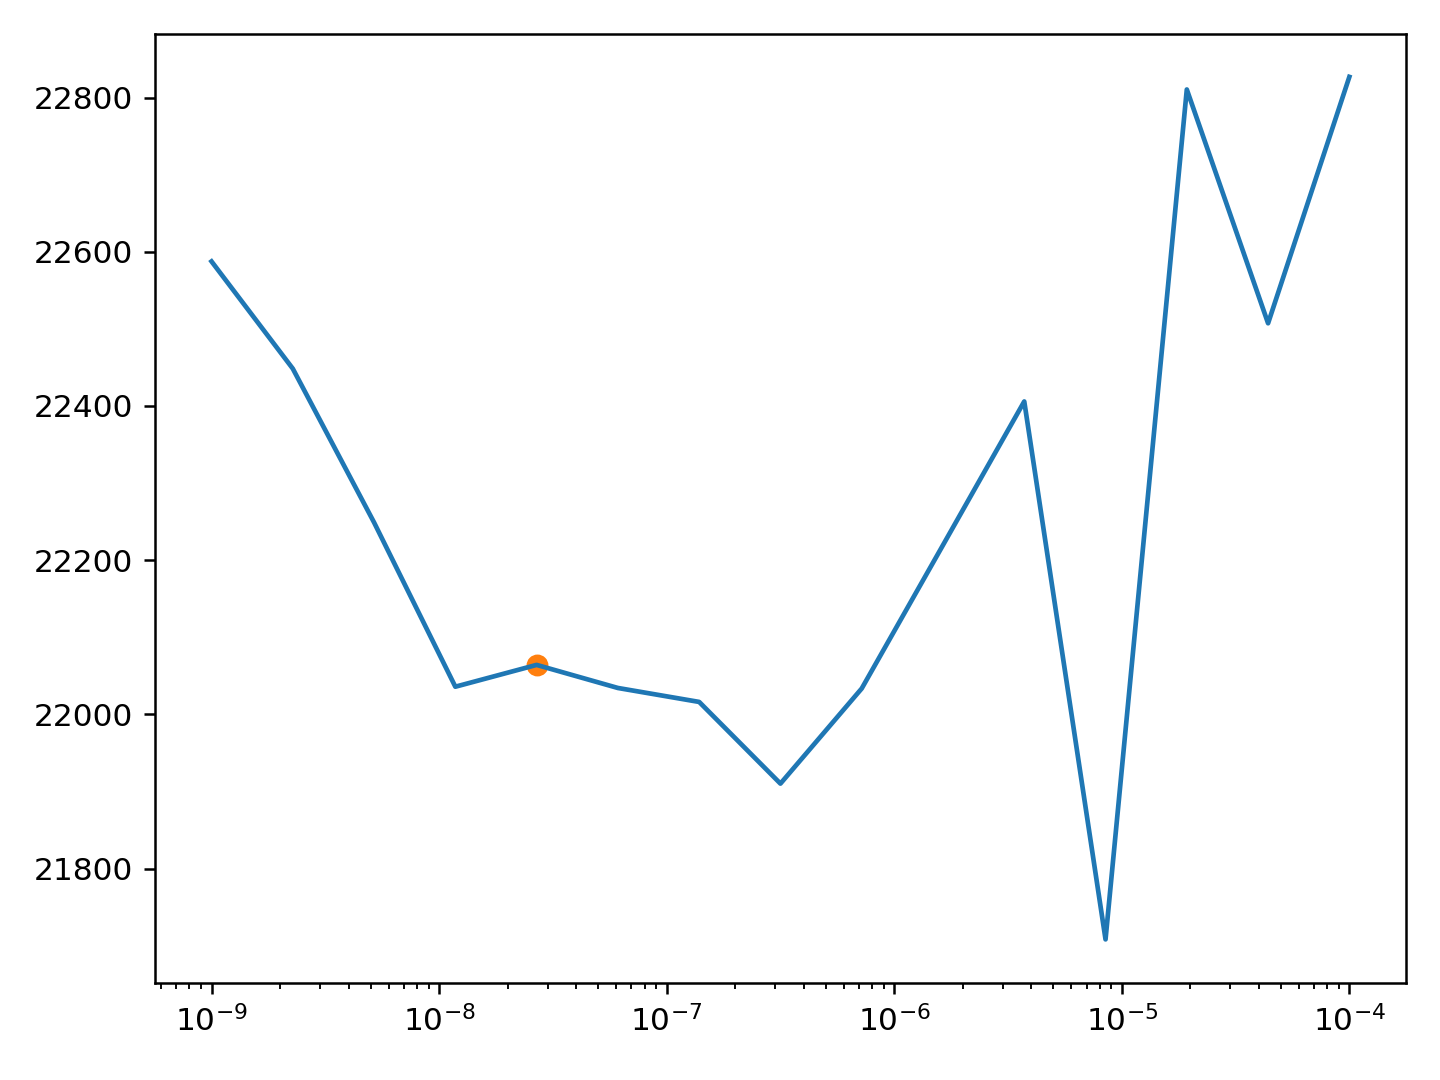

(22064.185546875, 2.682695795279727e-08)

In [442]:
plt.figure()
plt.plot(xwts, tots);
plt.xscale('log');
plt.tight_layout();

pick = np.argmax(tots).item()
pick = 4

u = xwts[pick]
prices = torch.as_tensor([tk.info.get('currentPrice') for tk in tks])
indices = {tk.ticker:i for i, tk in enumerate(tks)}
best, x, cr, opt_count, cost, total = outs[pick]
plt.scatter([u], [total], c='C1')
total, u


In [537]:
forced = {
#     'MRK.DE': 7,
    'VER.VI': 3,
    'EDF.PA': 12,
    'EOAN.DE': 12,
    'IIA.VI': 12,
#     'SAN.PA': 8,
    'NEXI.MI': 80,
#     'SIE.DE': 7,
    'SAN.PA': 2,
    'RACE.MI': 1,
    'OR.PA': 1,
    'ENI.MI': 15,
    'PHIA.AS': 19,
    'SAN.PA': 4,
    'LHA.DE': 20,
    'AMS.MC': 18,
    'SAP.DE': 8,
    'ZAL.DE': 4,
    'PROX.BR': 25,
    'UBI.PA': 6,
    'KER.PA': 2,
    'SIE.DE': 5,
    'TKA.VI': 20,
    'REP.MC': 10,
    'ISP.MI': 100,
    'RBI.VI': 42,
}
count = opt_count.clone()
for tk,n in forced.items():
    count[indices[tk]] = n #max(n,count[indices[tk]])
cost = count * prices
cost.sum().item(), cost.sum().item()/capital*100

(24643.3046875, 98.57321875)

In [538]:
gold = tks[count.numpy()>0].tolist()
len(gold)

56

In [539]:
print('Yield: {:2.2f}%'.format(100*(torch.as_tensor([0. if tk.info.get('dividendYield', 0.) is None else tk.info.get('dividendYield', 0.) for tk in tks]) @ cost / capital).item()))
print(tabulate(group_tables(dict(zip(tks,cost.tolist())), key='country')))
print(tabulate(group_tables(dict(zip(tks,cost.tolist())), key='sector')))
# tk_pc = dict(zip(tks.tolist(),best.mul(100).tolist()))
tk_cn = dict(zip(tks.tolist(),count.tolist()))
tk_ct = dict(zip(tks.tolist(),cost.div(cost.sum()).mul(100).tolist()))
tk_prev = {} if existing is None else {tk: existing.get(tk, 0) for tk in tks}
tk_delta = {} if existing is None else {tk: tk_cn[tk] - existing.get(tk, 0) for tk in tks}
# tk_delta = {tk: f'+{n}' if n > 0 else str(n) for tk, n in tk_delta.items()}
# order = best.sort(0,descending=True)[1]
# order = count.sort(0,descending=True)[1]
# frows = [[tk.ticker, tk.info.get('sector'), tk.info.get('country'), c, b*100] for tk, b, c in zip(tks[order.numpy()].tolist(), best[order].tolist(), count[order].tolist()) if c > 0]
# f_titles = ['Ticker', 'Sector', 'Country', '#', '%']
frows = [[tk_ct[tk], tk_cn[tk], *_collect_tk(tk)[1:]] for tk in tks]# if tk_cn[tk] > 0]
ftitles = ['%', '#', *row_titles[1:]]
ftitles = ['%', '#', *row_titles[1:]]
len(frows)
# qgrid_widget = qgrid.show_grid(pd.DataFrame(frows, columns = ftitles), show_toolbar=True)
# qgrid_widget

Yield: 2.52%
-----------  ---------
Germany      24.8459
France       21.58
Netherlands  15.7857
Austria      10.2743
Spain        10.2177
Italy         8.32589
Belgium       5.94665
Portugal      2.03544
Switzerland   0.988504
-----------  ---------
----------------------  --------
Technology              15.2139
Financial Services      14.5219
Healthcare              13.8712
Consumer Cyclical       10.7426
Industrials             10.6397
Communication Services   7.73314
Utilities                7.53351
Consumer Defensive       6.04002
Real Estate              5.88785
Basic Materials          5.45438
Energy                   2.36188
----------------------  --------


57

In [540]:
tk_order = sorted(tks, reverse=True, key=lambda tk: tk_ct[tk])
html_table = [[tk.ticker,
    flag_emojis.get(tk.info.get('country')),
    sector_emojis.get(tk.info.get('sector'), ''),
               tk.info.get('currentPrice'),
               tk_ct[tk], tk_prev.get(tk,'?'), tk_cn[tk], tk_delta.get(tk, '?'),
]
 for tk in tk_order]
html_table_colors = [colors[common.sector_aliases.get(tk.info.get('sector'),tk.info.get('sector'))] for tk in tk_order]
display(HTML(common.html_tabulate(html_table, colors=html_table_colors)))

EBS.VI,🇦🇹,💰,32.04,5.07059,9,39,30
ASML.AS,🇳🇱,📱,591.4,4.79968,1,2,1
BAYN.DE,🇩🇪,💊,65.07,4.75285,6,18,12
AIR.PA,🇳🇱,⚙️,105.82,4.72347,4,11,7
AI.PA,🇫🇷,🌲,161.78,4.59541,3,7,4
ALV.DE,🇩🇪,💰,220.3,4.46977,2,5,3
MRK.DE,🇩🇪,💊,181.1,4.40931,3,6,3
KER.PA,🇫🇷,🎁,541.9,4.39795,0,2,2
AMS.MC,🇪🇸,📱,58,4.23644,8,18,10
PRX.AS,🇳🇱,📞,44.79,3.63506,11,20,9
WDP.BR,🇧🇪,🏠,40.88,3.48362,9,21,12


In [532]:
# print(tabulate([[tk.ticker, tk_ct[tk], tk_prev.get(tk,'?'), tk_cn[tk], tk_delta.get(tk, '?')] 
#                 for tk in sorted(tks, reverse=True, key=lambda tk: tk_ct[tk])], headers=['TK', '%', '<-', '->', '+-']))